In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from IPython.display import IFrame, display

In [ ]:
filepath = "/content/Case Study - DataOps Algo-Trading.docx"
IFrame(filepath, width=750, height=750)

# Data Cleaning and Processing for Historical Electricity Dataset

## Introduction
In this case study, we have a synthetic dataset containing historical electricity demand, supply, and spot market prices for five European countries over the past decade. Our task is to clean and process the data to make it ready for analysis.

## Data Cleaning Steps
1. **Handling Missing Values**: Check the dataset for missing values and decide how to handle them. Options include:
   - Removing rows or columns with missing values if they are insignificant.
   - Imputing missing values using appropriate techniques such as mean, median, or regression imputation.
   - Creating a separate category or indicator variable for missing values if they carry important information.

2. **Removing Duplicate Entries**: Check for any duplicate entries in the dataset and remove them. Duplicates can distort analysis results and introduce bias.

3. **Outlier Detection and Handling**: Identify potential outliers in the dataset and decide how to handle them. Outliers can significantly affect statistical analysis. Options for handling outliers include:
   - Removing outliers if they are due to data entry errors or measurement issues.
   - Transforming the data using appropriate techniques such as winsorization or log transformation.
   - Treating outliers as a separate category if they represent valid extreme values.

4. **Data Formatting and Standardization**: Ensure that the data is formatted correctly and standardized for consistency. This step may include:
   - Converting data types if necessary (e.g., converting date/time strings to datetime objects).
   - Standardizing units of measurement to ensure compatibility across variables.
   - Rescaling variables to a common scale if required.

5. **Handling Inconsistent or Erroneous Data**: Check for any inconsistencies or errors in the data and resolve them. This step may involve:
   - Cross-checking data against external sources or domain knowledge to identify discrepancies.
   - Correcting data entry errors or resolving inconsistencies based on logical reasoning.

## Conclusion
Cleaning and processing the historical electricity dataset is crucial to ensure the accuracy and reliability of subsequent analyses. By following the steps outlined above, we can prepare the data for further exploration, modeling, and gaining valuable insights.


#### Importing Libraries

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Task/west_europe_electricity_data.csv',index_col=0)

In [ ]:
data.head()

country       demand       supply      price
date                                                             
2010-01-01 00:00:00  Germany   998.434819   860.616813  34.804159
2010-01-01 01:00:00  Germany  1113.064624   903.022739  36.977960
2010-01-01 02:00:00  Germany  1229.650095  1062.041675  34.734515
2010-01-01 03:00:00  Germany  1220.779348  1258.040931  29.111438
2010-01-01 04:00:00  Germany  1324.864598  1239.289276  32.071558

#### Data Index Conversion and Sorting

In [ ]:
data.index = pd.to_datetime(data.index, format="%Y.%m.%d %H:%M:%S")
data=data.sort_index(ascending=True)

#### Dataset Description

In [ ]:
data.describe

<bound method NDFrame.describe of                 country      demand      supply      price
date                                                      
2010-01-01      Germany  998.434819  860.616813  34.804159
2010-01-01        Italy  493.997281  489.221243  30.292876
2010-01-01        Spain  422.684319  525.345348  24.137512
2010-01-01       France  688.061272  532.395617  38.771616
2010-01-01  Netherlands  298.066053  392.279058  22.794950
...                 ...         ...         ...        ...
2023-05-31  Netherlands  262.766525  271.852718  38.997303
2023-05-31        Italy  394.634157  283.999423  51.686791
2023-05-31      Germany  655.883223  582.250537        NaN
2023-05-31       France  460.036318  428.863371  42.180621
2023-05-31        Spain  312.514278  333.166063  38.140406

[587765 rows x 4 columns]>

#### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 587765 entries, 2010-01-01 00:00:00 to 2023-05-31 00:00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  587765 non-null  object 
 1   demand   587765 non-null  float64
 2   supply   587765 non-null  float64
 3   price    571622 non-null  float64
dtypes: float64(3), object(1)
memory usage: 22.4+ MB


#### Number of Countries

In [ ]:
print ('Number of Countries '+ str(data['country'].nunique()))

Number of Countries 5


#### Counting the enteries by country

In [ ]:
print('Country')
data.groupby('country').count()

Country


demand  supply   price
country                            
France       117553  117553  114615
Germany      117553  117553  114615
Italy        117553  117553  114615
Netherlands  117553  117553  113162
Spain        117553  117553  114615

There are missing values in the price columnn across the countries.

#### Printing Missing Values

In [ ]:
print(data.isnull().sum())

country        0
demand         0
supply         0
price      16143
dtype: int64


#### Finding duplicates

In [ ]:
# Identify duplicate rows
duplicates = data.duplicated()

# Print duplicate rows
duplicate_rows = data[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [country, demand, supply, price]
Index: []


### Grouping Data by Country

In [ ]:
grouped= data.reset_index(drop=False)


In [ ]:
grouped

date      country      demand      supply      price
0      2010-01-01      Germany  998.434819  860.616813  34.804159
1      2010-01-01        Italy  493.997281  489.221243  30.292876
2      2010-01-01        Spain  422.684319  525.345348  24.137512
3      2010-01-01       France  688.061272  532.395617  38.771616
4      2010-01-01  Netherlands  298.066053  392.279058  22.794950
...           ...          ...         ...         ...        ...
587760 2023-05-31  Netherlands  262.766525  271.852718  38.997303
587761 2023-05-31        Italy  394.634157  283.999423  51.686791
587762 2023-05-31      Germany  655.883223  582.250537        NaN
587763 2023-05-31       France  460.036318  428.863371  42.180621
587764 2023-05-31        Spain  312.514278  333.166063  38.140406

[587765 rows x 5 columns]

In [ ]:
grouped_country=grouped.groupby('country')


#### Analyzing the data based on the country

In [ ]:
grouped_country.head()

date      country       demand       supply      price
0  2010-01-01 00:00:00      Germany   998.434819   860.616813  34.804159
1  2010-01-01 00:00:00        Italy   493.997281   489.221243  30.292876
2  2010-01-01 00:00:00        Spain   422.684319   525.345348  24.137512
3  2010-01-01 00:00:00       France   688.061272   532.395617  38.771616
4  2010-01-01 00:00:00  Netherlands   298.066053   392.279058  22.794950
5  2010-01-01 01:00:00      Germany  1113.064624   903.022739  36.977960
6  2010-01-01 01:00:00        Italy   513.344075   465.222645  33.103123
7  2010-01-01 01:00:00        Spain   551.357330   449.468814  36.800595
8  2010-01-01 01:00:00       France   529.088308   661.080765  24.010151
9  2010-01-01 01:00:00  Netherlands   418.573799   371.078950  33.839737
10 2010-01-01 02:00:00        Italy   583.433855   629.437365  27.807399
11 2010-01-01 02:00:00        Spain   618.582871   514.413509  36.075037
12 2010-01-01 02:00:00       France   735.128380   588.163231  37.496141
13 2010-01-01 02:00:00      Germany  1229.650095  1062.041675  34.734515
14 2010-01-01 02:00:00  Netherlands   382.196473   443.006634  25.881992
15 2010-01-01 03:00:00  Netherlands   436.967466   440.918782  29.731153
16 2010-01-01 03:00:00        Italy   641.705158   506.419841  38.014219
17 2010-01-01 03:00:00       France   789.518067   765.084662  30.958067
18 2010-01-01 03:00:00      Germany  1220.779348  1258.040931  29.111438
19 2010-01-01 03:00:00        Spain   659.827858   575.965717  34.368080
20 2010-01-01 04:00:00      Germany  1324.864598  1239.289276  32.071558
21 2010-01-01 04:00:00        Spain   635.558345   620.919536  30.707280
22 2010-01-01 04:00:00       France   781.846826   785.341719  29.866495
23 2010-01-01 04:00:00  Netherlands   499.912616   483.293188  31.031636
24 2010-01-01 04:00:00        Italy   627.855156   525.668362  35.831821

#### Finding number of missing timestamps for each country in the Price column

In [ ]:
# Loop through each group
for name, group in grouped_country:
    # Create a list of all possible timestamps
    idx = pd.date_range(start=group['date'].min(), end=group['date'].max())
    # Convert the list to a dataframe
    df = pd.DataFrame(idx, columns=['date'])
    # Merge the dataframe with the group dataframe to find missing timestamps
    missing = pd.merge(df, group, on='date', how='outer')
    # Count the number of missing timestamps
    num_missing = missing['price'].isnull().sum()
    # Get the start and end timestamps
    if num_missing > 0:
        start_missing_time = missing[missing['price'].isnull()]['date'].min()
        end_missing_time = missing[missing['price'].isnull()]['date'].max()
        # Print the results
        print(f'Country: {name}')
        print(f'Number of missing timestamps: {num_missing}')
        print(f'Start timestamp of missing values: {start_missing_time}')
        print(f'End timestamp of missing values: {end_missing_time}')
        print('\n')


Country: France
Number of missing timestamps: 2938
Start timestamp of missing values: 2010-01-01 10:00:00
End timestamp of missing values: 2023-05-29 04:00:00


Country: Germany
Number of missing timestamps: 2938
Start timestamp of missing values: 2010-01-03 11:00:00
End timestamp of missing values: 2023-05-31 00:00:00


Country: Italy
Number of missing timestamps: 2938
Start timestamp of missing values: 2010-01-01 15:00:00
End timestamp of missing values: 2023-05-30 22:00:00


Country: Netherlands
Number of missing timestamps: 4391
Start timestamp of missing values: 2010-01-02 01:00:00
End timestamp of missing values: 2023-05-30 13:00:00


Country: Spain
Number of missing timestamps: 2938
Start timestamp of missing values: 2010-01-01 21:00:00
End timestamp of missing values: 2023-05-28 23:00:00




#### Visiualizing the missing time stamps for each country in the Price column

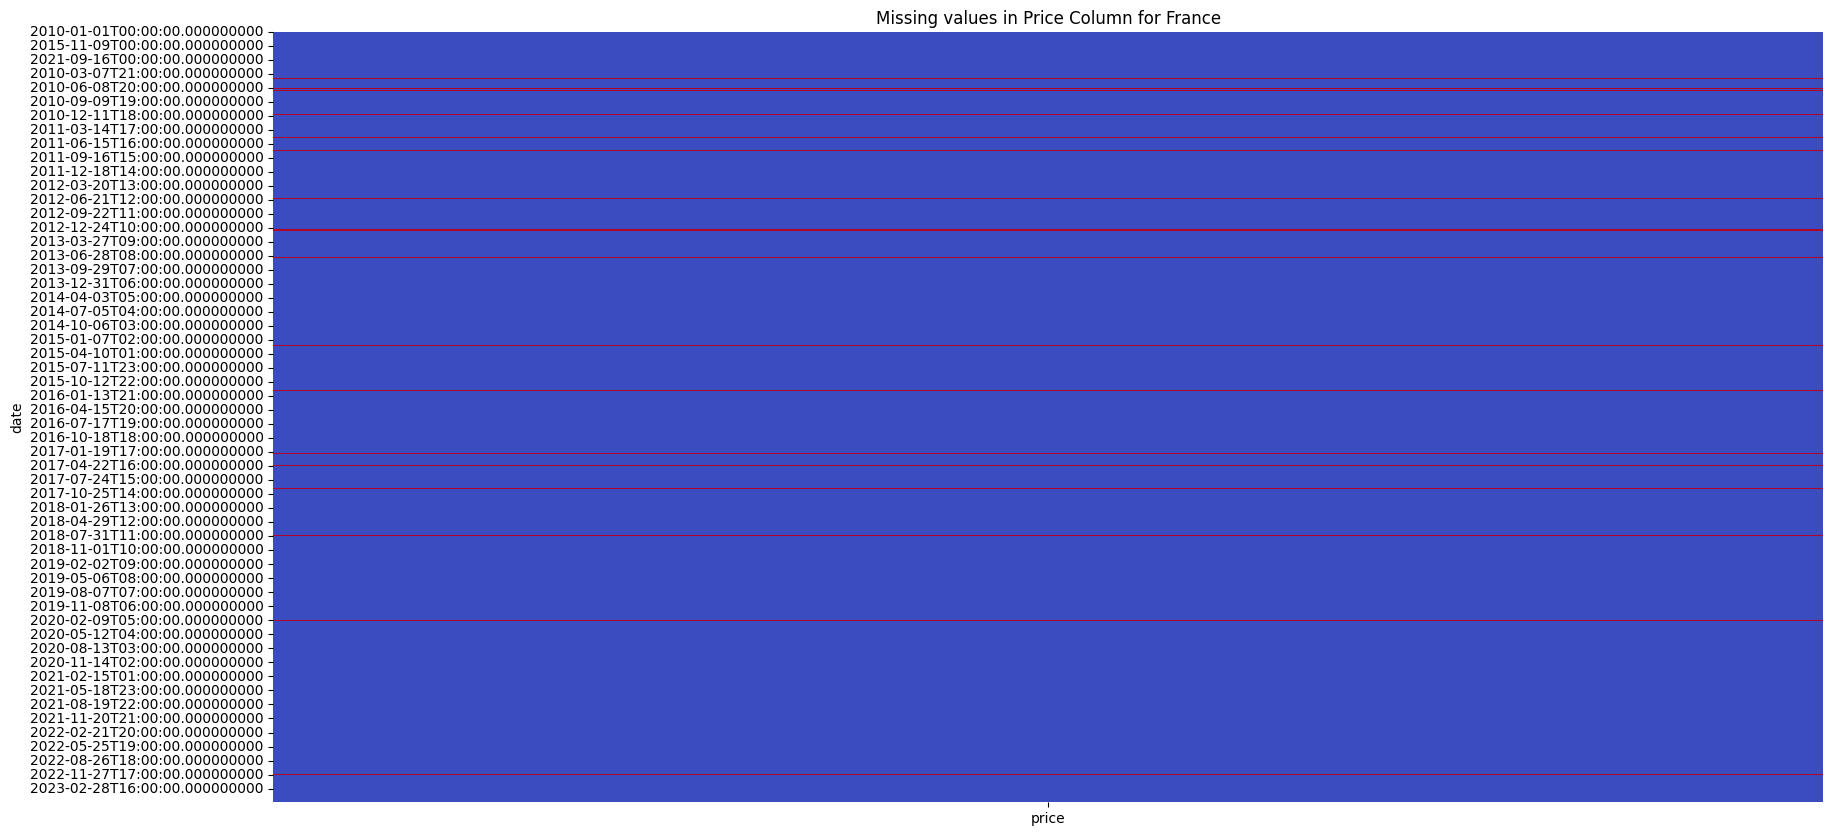

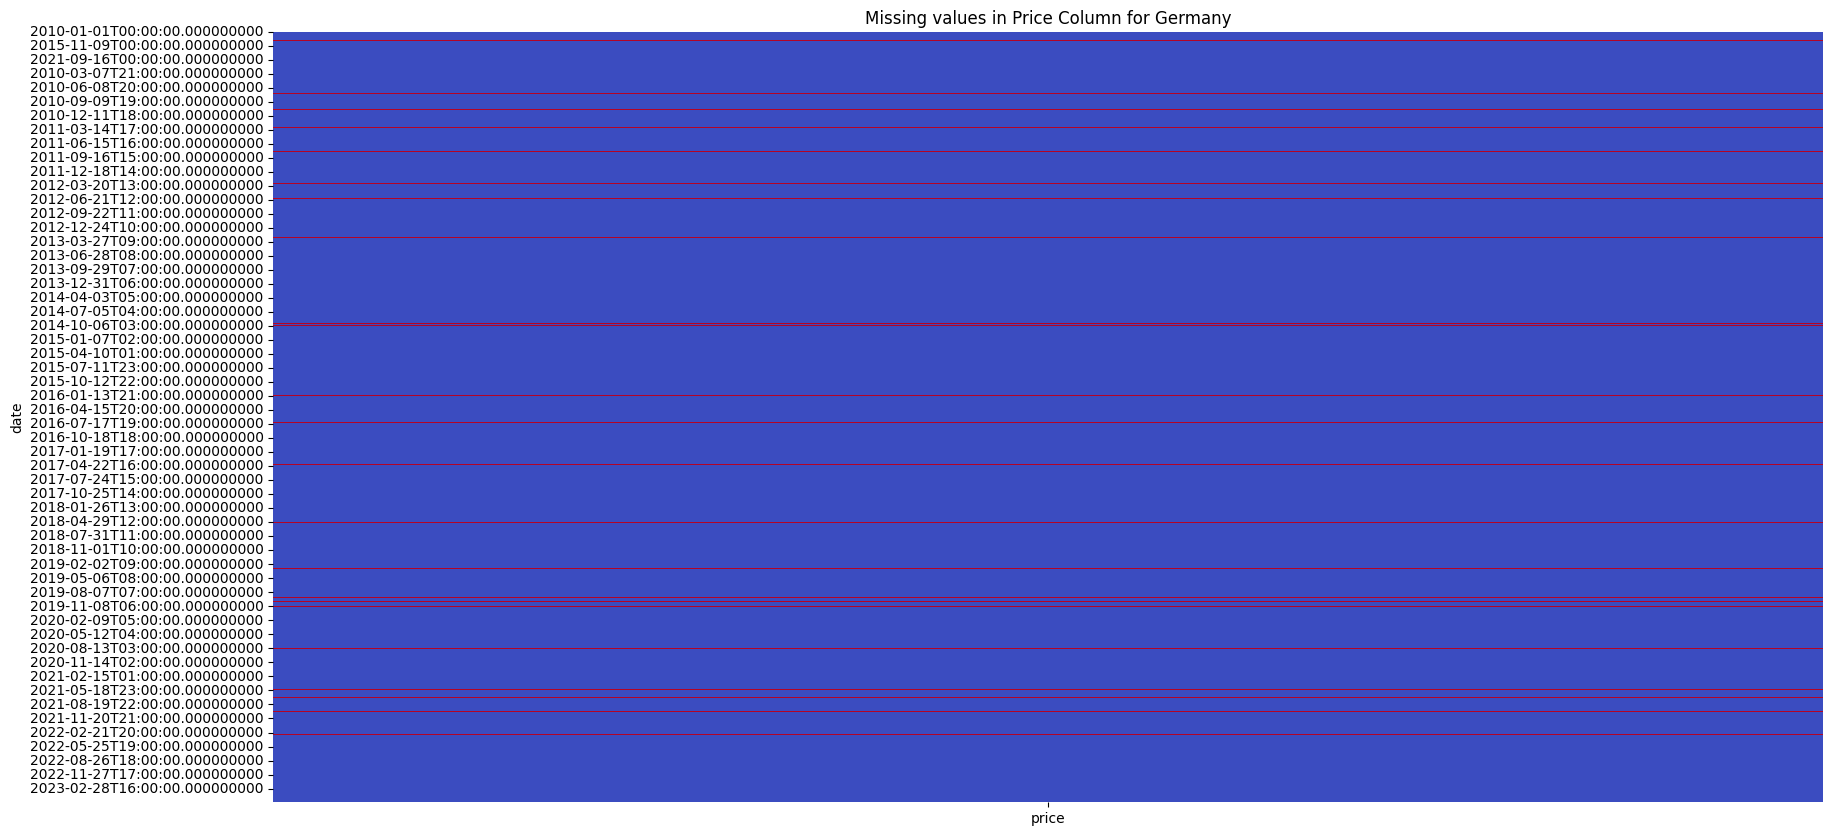

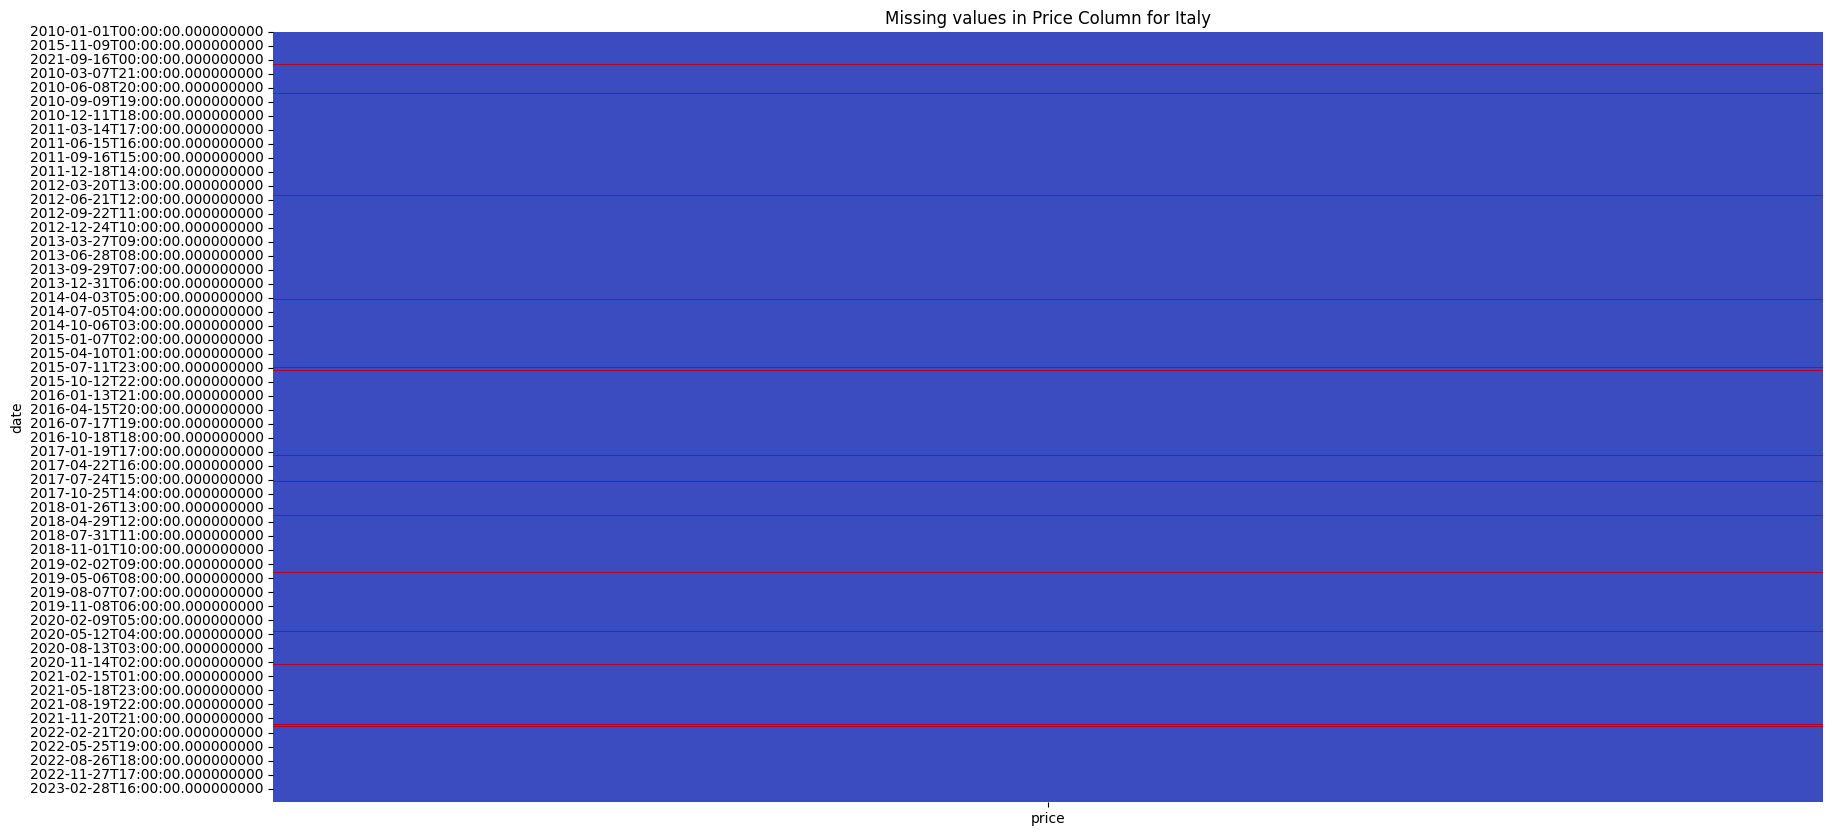

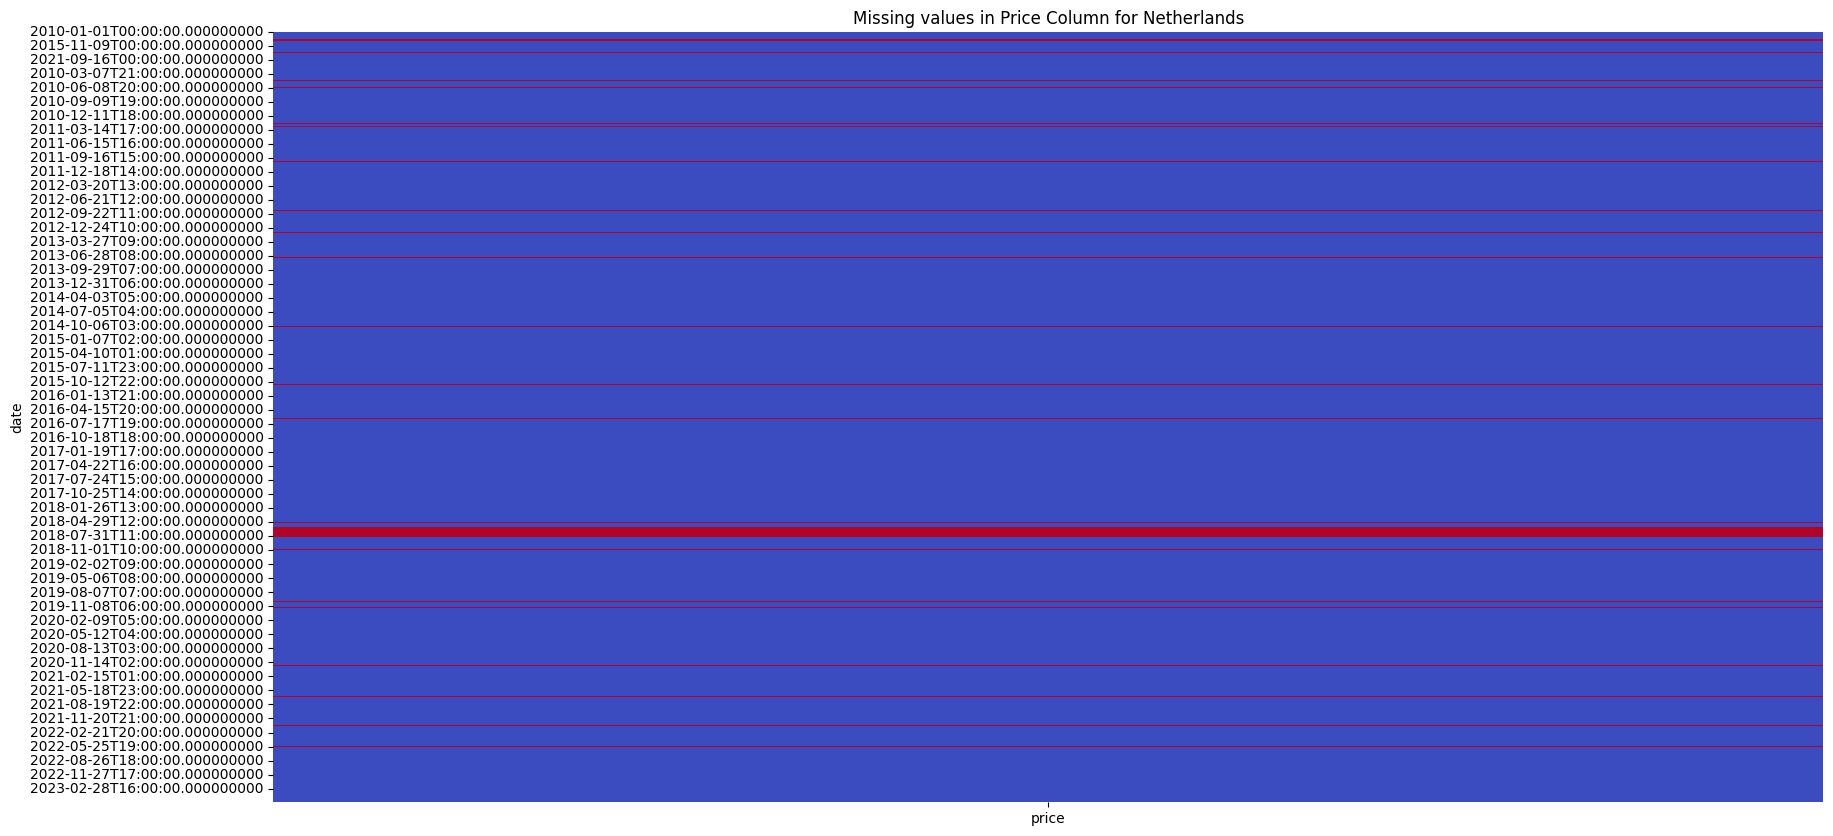

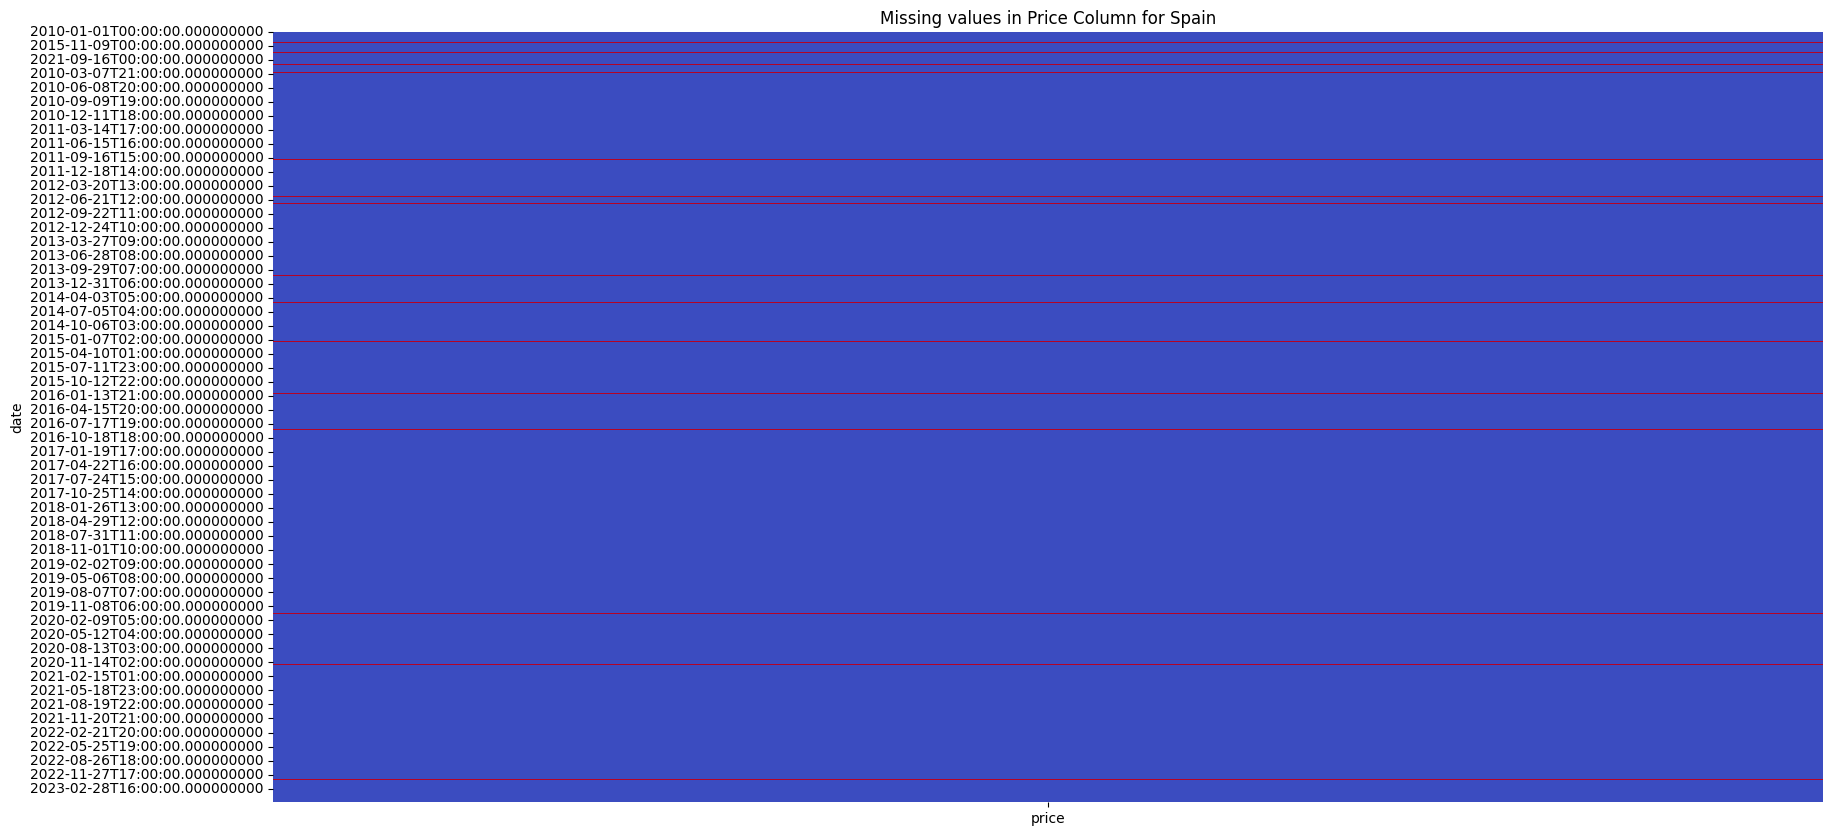

In [ ]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt



# Loop through each group
for name, group in grouped_country:
    # Create a list of all possible timestamps
    idx = pd.date_range(start=group['date'].min(), end=group['date'].max())
    # Convert the list to a dataframe
    df = pd.DataFrame(idx, columns=['date'])
    # Merge the dataframe with the group dataframe to find missing timestamps
    missing = pd.merge(df, group, on='date', how='outer')
    # Set the index to the DATE_TIME column and drop the SOURCE_KEY column
    missing = missing.set_index('date').drop('country', axis=1)
    # Create the heatmap plot of missing values
    plt.figure(figsize=(20, 10))
    sns.heatmap(missing['price'].isna().to_frame(), cmap='coolwarm', cbar=False)
    plt.yticks(rotation=0)
    plt.title(f'Missing values in Price Column for {name}')
    plt.show()


Small number of Null across every time stamp or time interval in the price column for each country apart from Nedherland

#### Plotting Data Demand & Supply for each countries

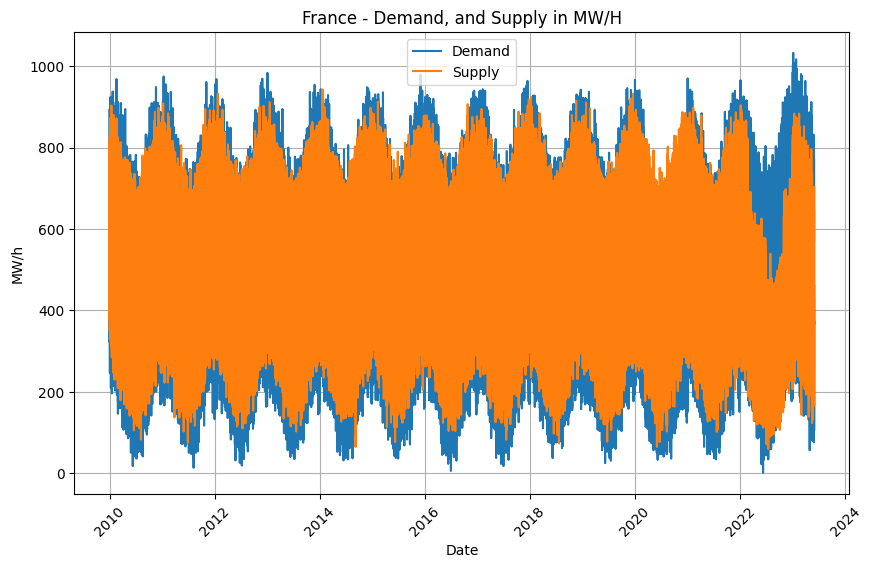

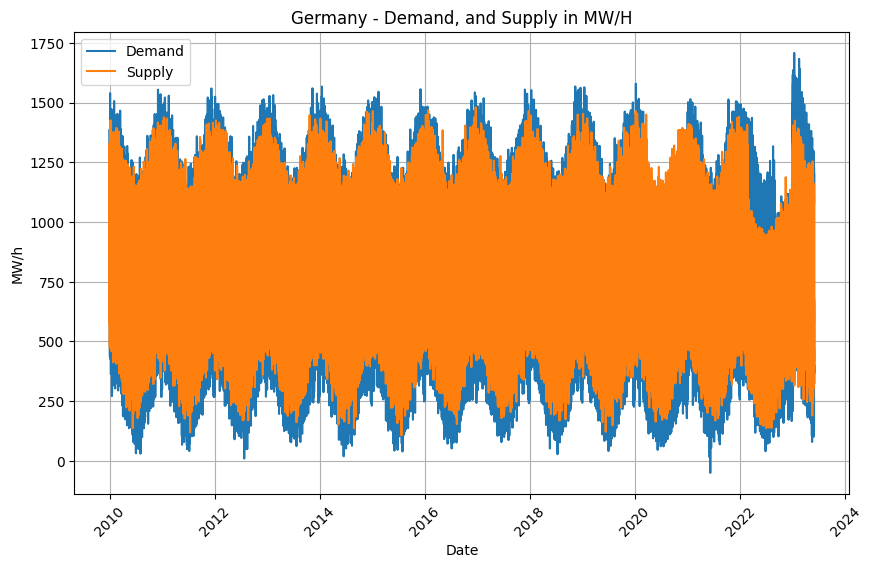

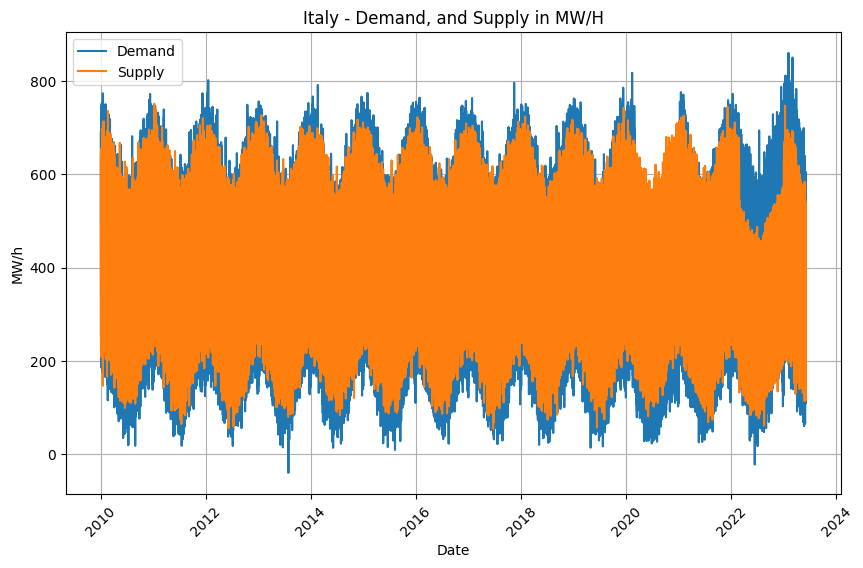

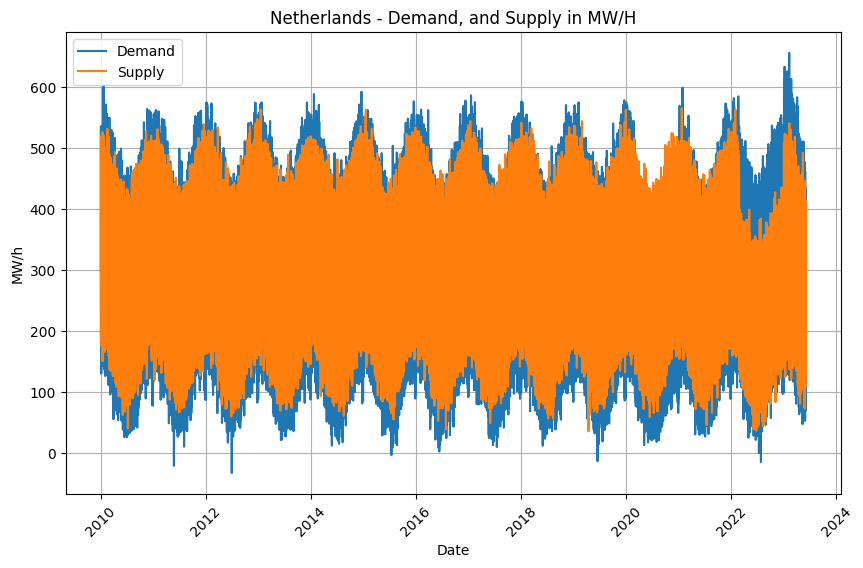

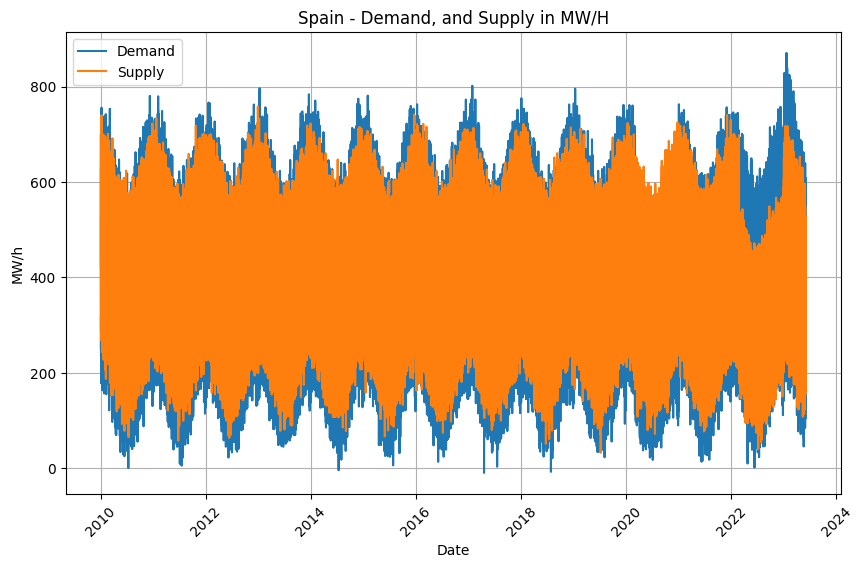

In [ ]:
# Loop through each group and plot the data
for name, group in grouped_country:
    plt.figure(figsize=(10, 6))

    # Plot price
    #plt.plot(group['date'], group['price'], label='Price')

    # Plot demand
    plt.plot(group['date'], group['demand'], label='Demand')

    # Plot supply
    plt.plot(group['date'], group['supply'], label='Supply')

    plt.xlabel('Date')
    plt.ylabel('MW/h')
    plt.title(f'{name} - Demand, and Supply in MW/H')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()

From the graph it is clearly seen that after 2022 there were disruption in the supply or there is decrease in the supply

#### Plotting Data Spot Price for each countries

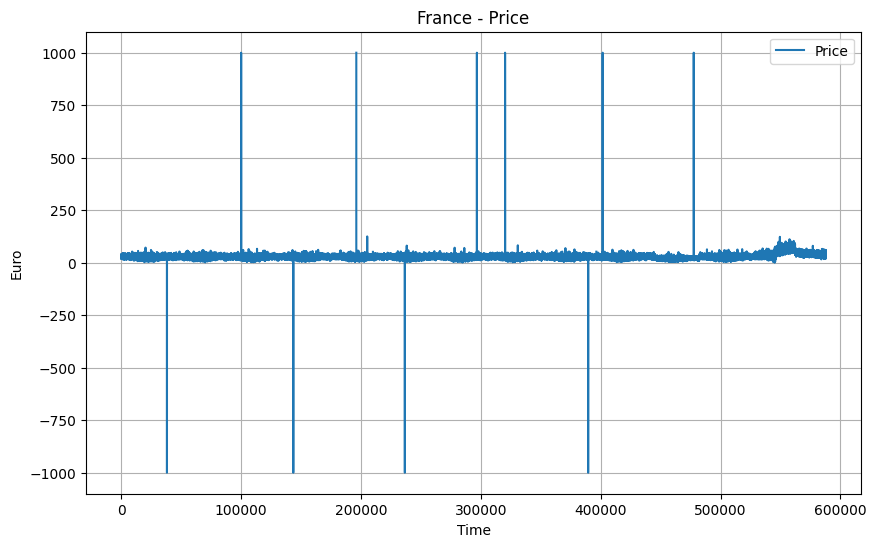

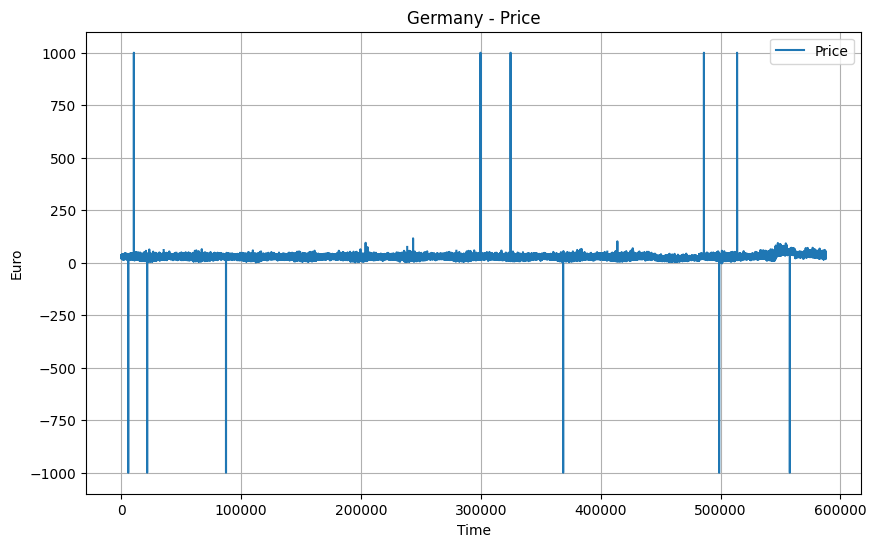

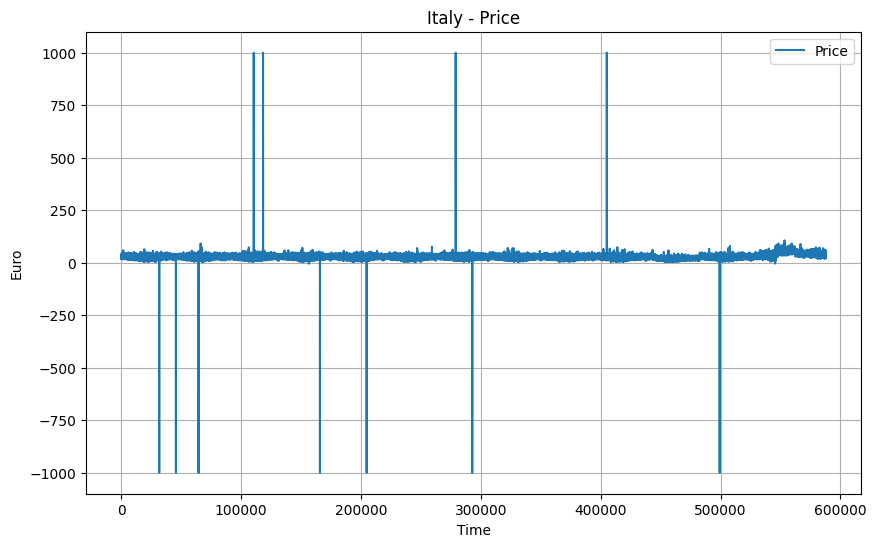

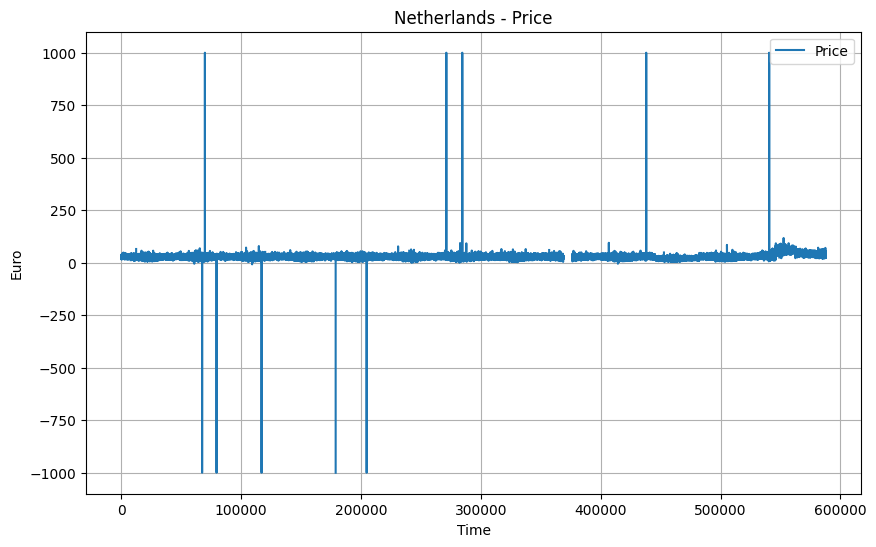

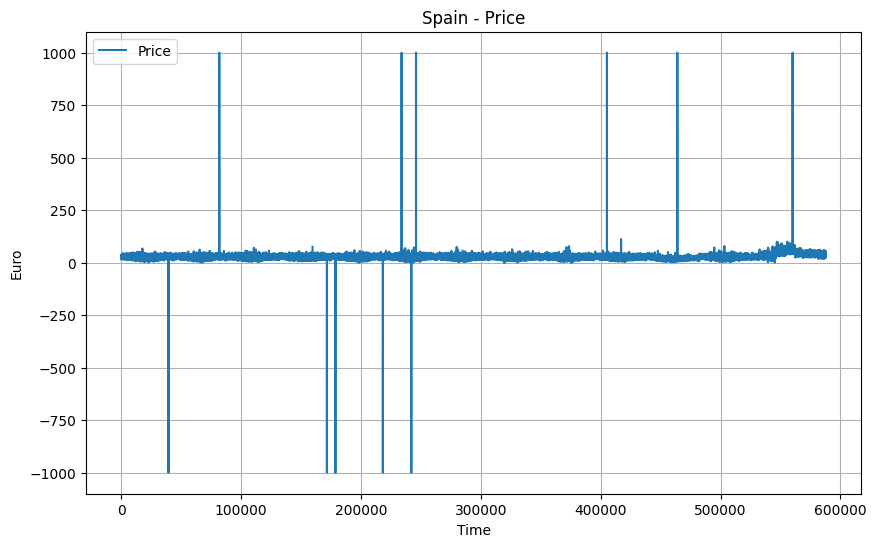

In [ ]:
# Loop through each group and plot the graph
for name, group in grouped_country:
    plt.figure(figsize=(10, 6))

    # Plot the supply and demand
    plt.plot(group['price'], label='Price')
    #plt.plot(group['demand'], label='Demand')

    plt.xlabel('Time')
    plt.ylabel('Euro')
    plt.title(f'{name} - Price')
    plt.legend()
    plt.grid(True)

    plt.show()

From the above grpah it is evident that there are outlier in the the Spot Prices with Values such as -1000 and 1000

## Detect and Handle Outliers

Outliers are data points that deviate significantly from the majority of the data. They can have a significant impact on statistical analysis and machine learning models. Therefore, it is crucial to detect and handle outliers appropriately to ensure accurate and robust results.

### Z-Score

One technique for outlier detection is the Z-score method. The Z-score measures how many standard deviations a data point is away from the mean. Typically, data points with a Z-score greater than a certain threshold (e.g., 3 or -3) are considered outliers.

To detect outliers using the Z-score method:

1. Calculate the Z-score for each data point using the formula: `(data - mean) / standard deviation`.
2. Define a threshold value beyond which data points will be considered outliers.
3. Identify and flag the outliers based on the threshold.

### Interquartile Range (IQR)

Another technique for outlier detection is the Interquartile Range (IQR) method. The IQR is a measure of statistical dispersion, representing the range between the first quartile (Q1) and the third quartile (Q3) of the data. Outliers are typically identified using the IQR as follows:

1. Calculate the IQR as the difference between Q3 and Q1: `IQR = Q3 - Q1`.
2. Define a threshold value, usually a factor (e.g., 1.5) multiplied by the IQR.
3. Identify and flag the outliers as data points that fall below Q1 - threshold or above Q3 + threshold.

### Handling Outliers

Once outliers have been detected, there are several strategies to handle them:

1. Mean/Median/Mode Imputation:Replaces missing values with the mean, median, or mode of the available data for that variable. Suitable for random missingness.

2. Regression Imputation: Uses regression models to estimate missing values based on relationships with other variables. Considers variable interdependencies.

3. Multiple Imputation: Generates multiple plausible imputations, incorporating within-variable and between-variable variability. Provides robust estimates by accounting for uncertainty in imputations.


Remember, the choice of outlier detection and handling technique depends on the specific characteristics of your data and the goals of your analysis. It is recommended to carefully evaluate the impact of outliers on your analysis and consult domain experts if necessary.


### Outlier Detection wih BOX plot

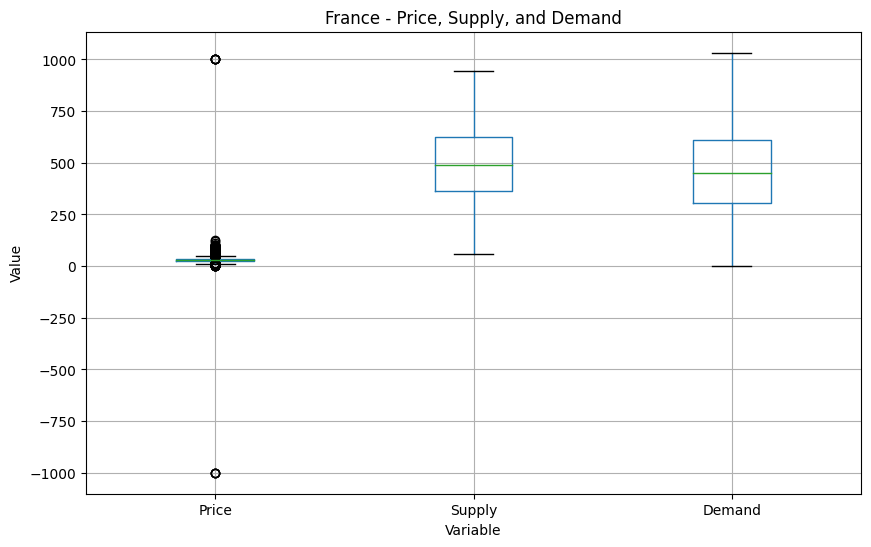

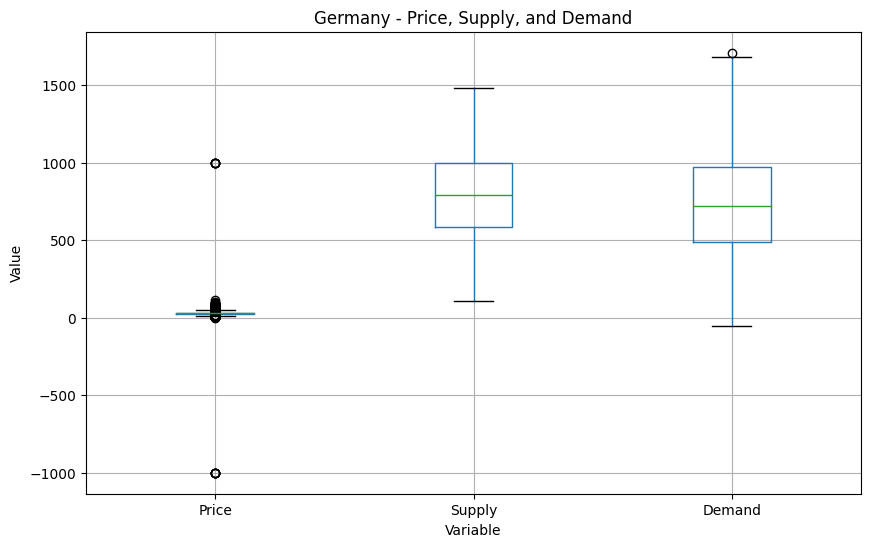

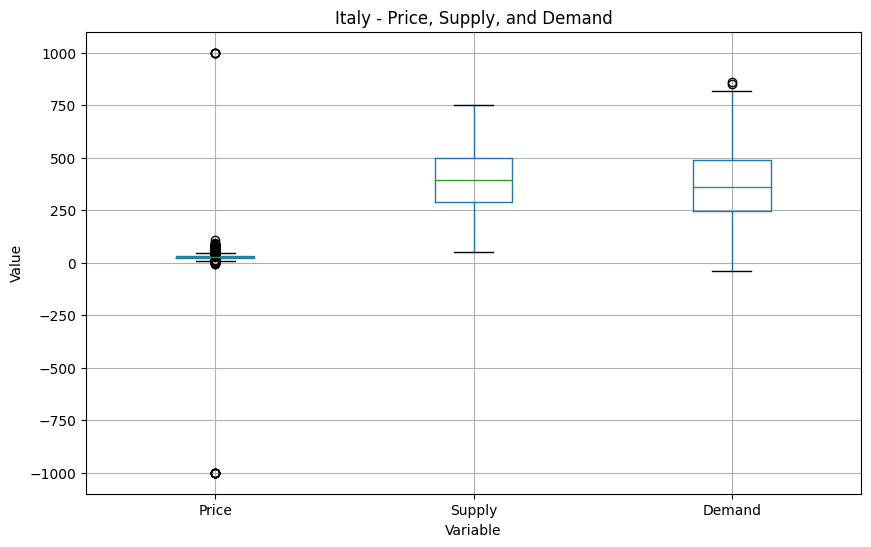

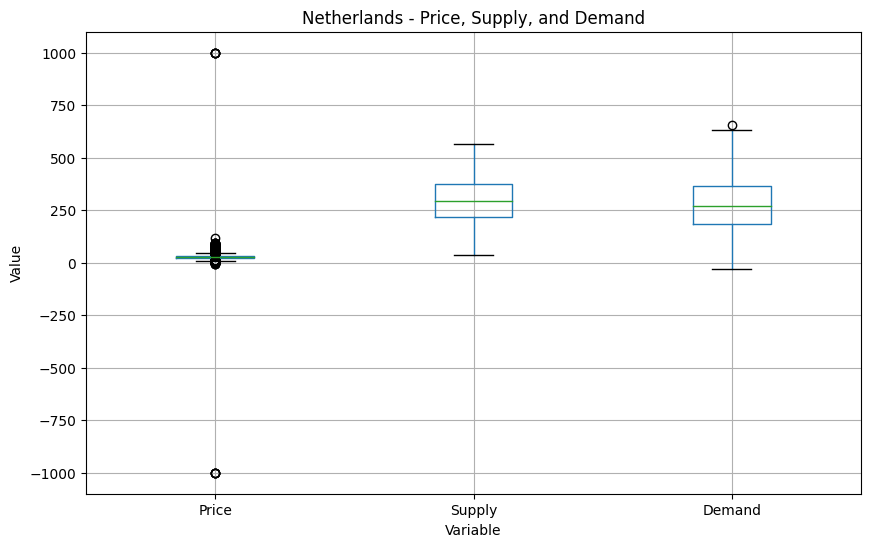

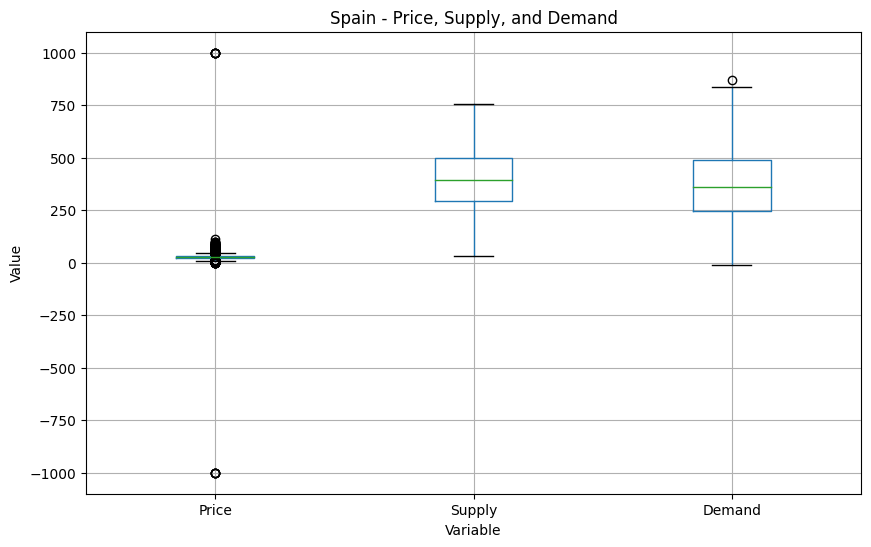

In [ ]:
import matplotlib.pyplot as plt

# Loop through each group and plot the box plots
for name, group in grouped_country:
    plt.figure(figsize=(10, 6))

    # Create a DataFrame for the specific country
    country_data = pd.DataFrame({'Price': group['price'], 'Supply': group['supply'], 'Demand': group['demand']})

    # Plot the box plots
    country_data.boxplot()

    plt.xlabel('Variable')
    plt.ylabel('Value')
    plt.title(f'{name} - Price, Supply, and Demand')
    plt.grid(True)

    plt.show()


#### Outlier Detection Z-score

<ipython-input-88-5f3f55053034>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group[column], hist=30, label=column)


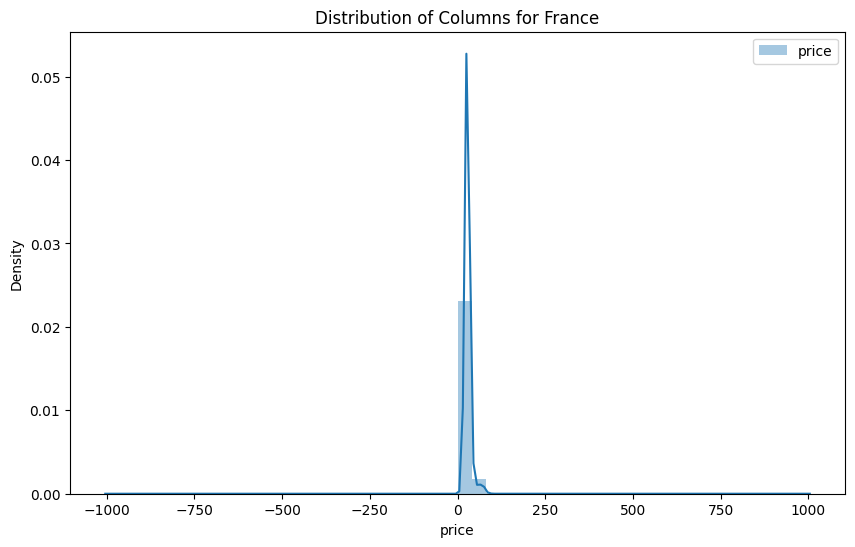

<ipython-input-88-5f3f55053034>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group[column], hist=30, label=column)


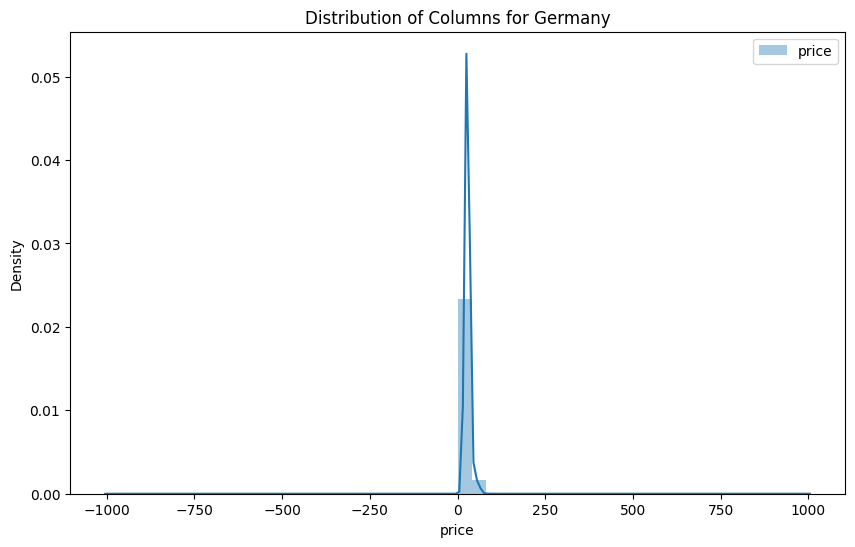

<ipython-input-88-5f3f55053034>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group[column], hist=30, label=column)


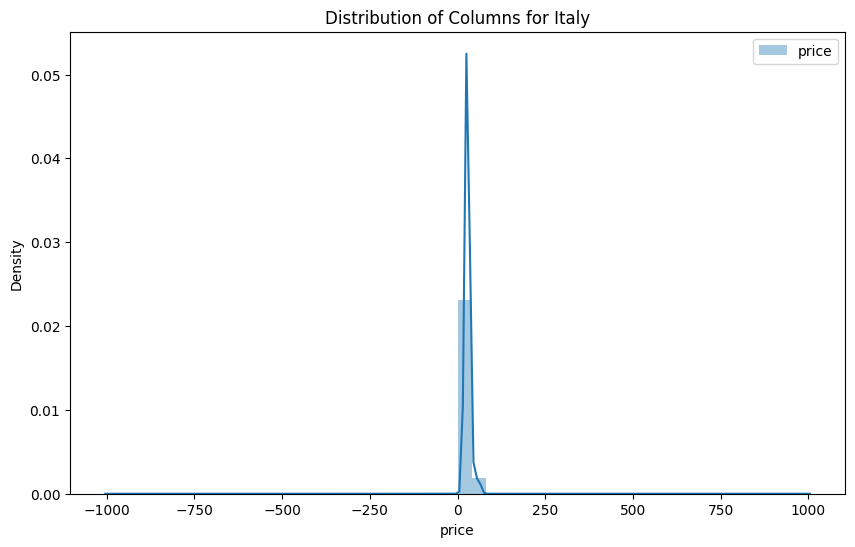

<ipython-input-88-5f3f55053034>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group[column], hist=30, label=column)


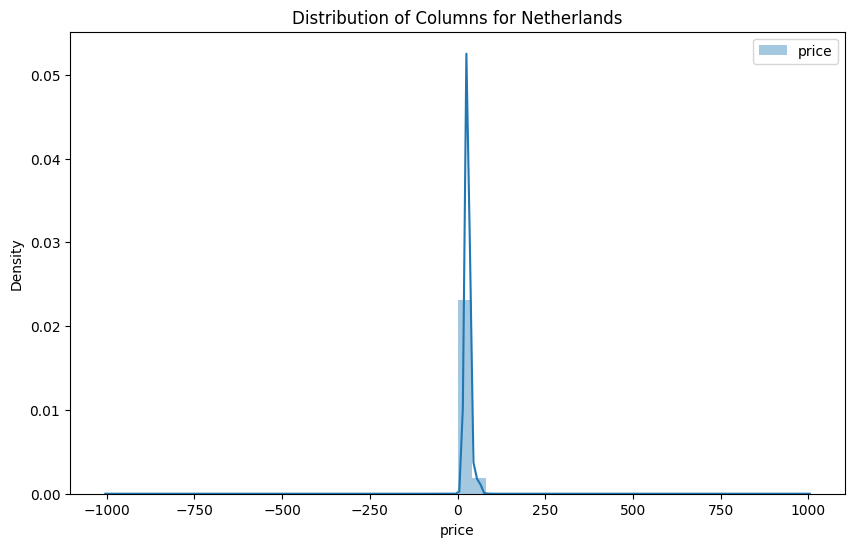

<ipython-input-88-5f3f55053034>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group[column], hist=30, label=column)


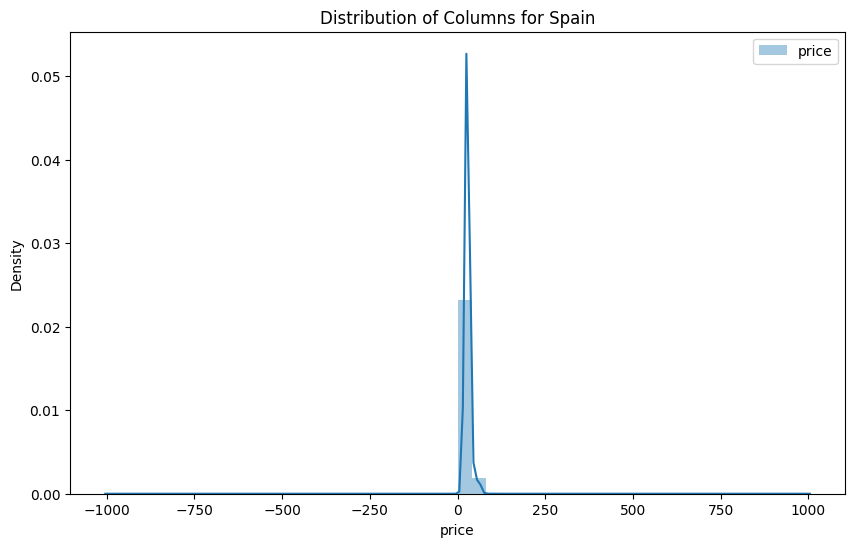

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each country
for country, group in grouped_country:
    # Plot the distribution of columns
    plt.figure(figsize=(10, 6))

    # Distribution plot
    for column in ['price']:
        sns.distplot(group[column], hist=30, label=column)



    plt.title(f'Distribution of Columns for {country}')
    plt.legend()
    plt.show()


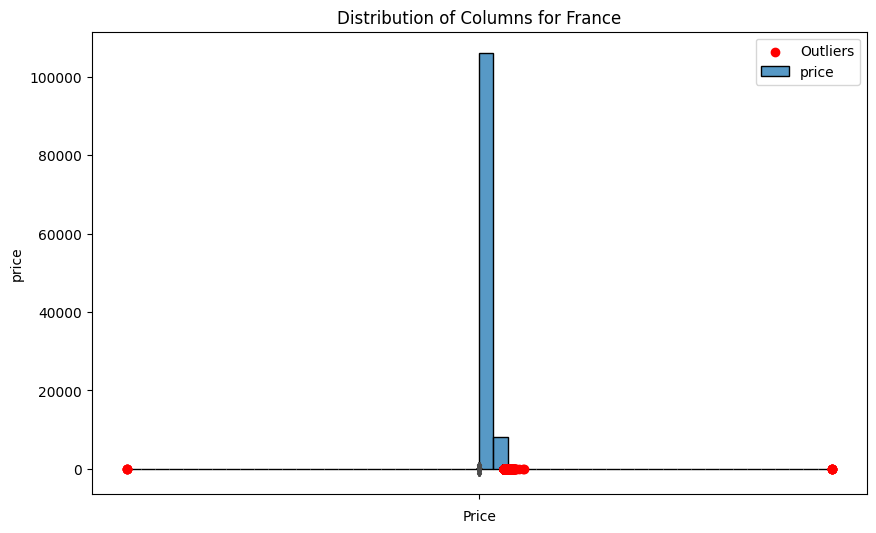

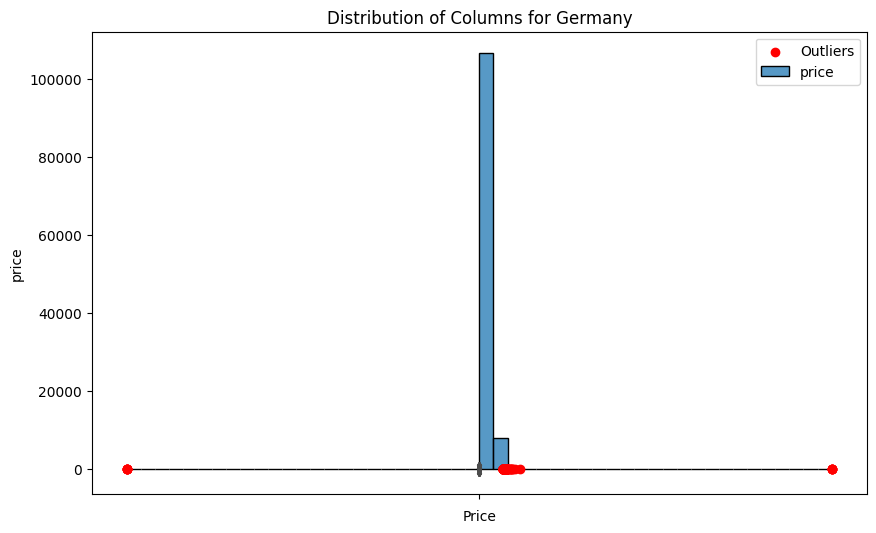

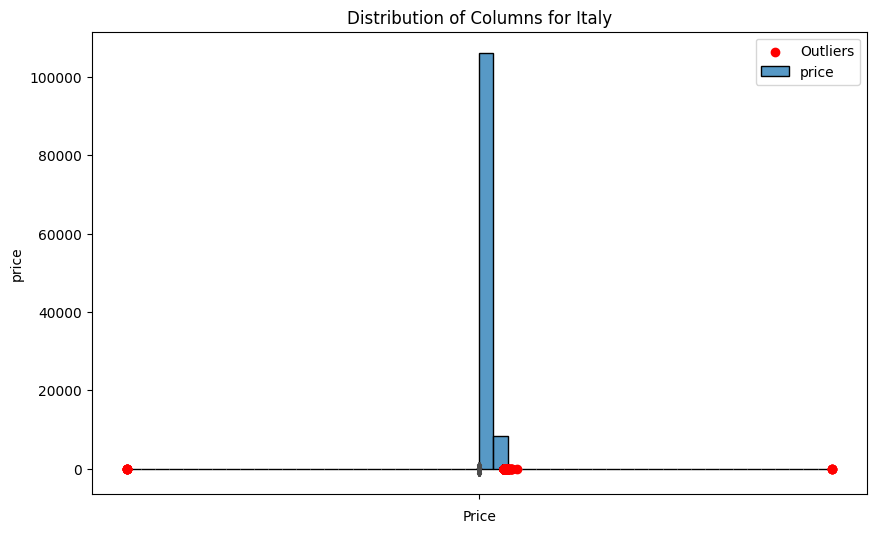

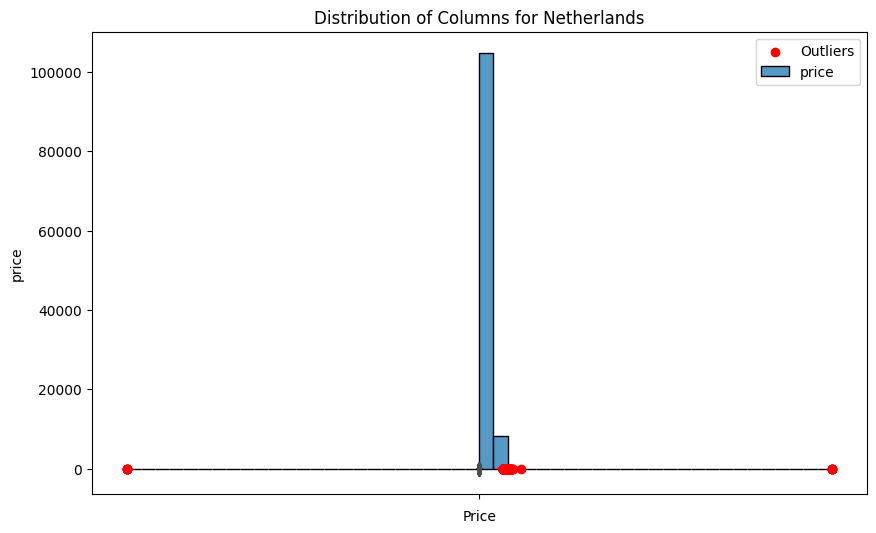

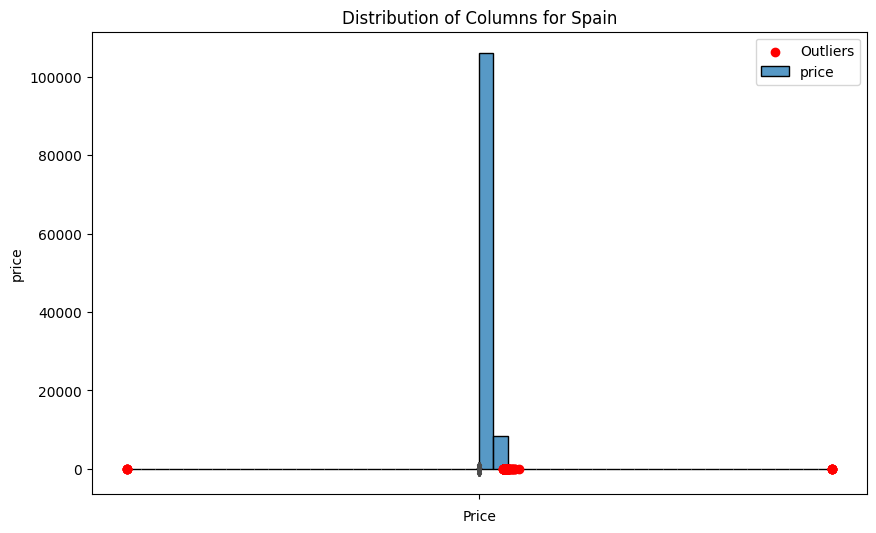

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to detect outliers using Z-score
def detect_outliers_zscore(data):
    z_scores = (data - np.mean(data)) / np.std(data)
    threshold = 3
    return np.abs(z_scores) > threshold

# Loop through each country
for country, group in grouped_country:
    # Detect outliers using Z-score
    outliers = detect_outliers_zscore(group['price'])

    # Plot the distribution of columns
    plt.figure(figsize=(10, 6))

    # Distribution plot
    for column in ['price']:
        sns.histplot(group[column], bins=50, label=column)

    # Boxplot to show outliers
    for column in ['price']:
        sns.boxplot(y=group[column], color='red', linewidth=1, fliersize=3)

    # Highlight outliers
    plt.scatter(group[outliers]['price'], np.zeros_like(group[outliers]['price']), color='red', label='Outliers')

    plt.title(f'Distribution of Columns for {country}')
    plt.xlabel('Price')
    plt.legend()
    plt.show()


In [ ]:
# Loop through each group and detect outliers
for name, group in grouped_country:
    # Calculate the IQR for the 'price' column
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1

    # Define the outlier threshold
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr

    # Detect outliers in the 'price' column
    outliers = group[(group['price'] < lower_threshold) | (group['price'] > upper_threshold)]

    # Print the detected outliers
    if not outliers.empty:
        print(f'Country: {name}')
        print('--- Outliers ---')
        print(outliers)
        print('\n')


Country: France
--- Outliers ---
                      date country      demand      supply      price
9093   2010-03-17 18:00:00  France  317.434931  179.015479  53.196785
10098  2010-03-26 03:00:00  France  801.353347  502.835218  47.810097
10651  2010-03-30 18:00:00  France  112.359293  360.523161   9.349687
11477  2010-04-06 15:00:00  France  377.235917  239.608046  47.231626
13273  2010-04-21 14:00:00  France  444.515380  285.082463  46.777558
...                    ...     ...         ...         ...        ...
587565 2023-05-29 09:00:00  France  830.750907  601.750350  51.416722
587587 2023-05-29 13:00:00  France  555.671660  333.746200  59.948583
587623 2023-05-29 20:00:00  France  317.233102  256.119753  47.158372
587678 2023-05-30 07:00:00  France  721.372072  568.943378  48.037462
587713 2023-05-30 14:00:00  France  374.391443  219.714581  61.119699

[5089 rows x 5 columns]


Country: Germany
--- Outliers ---
                      date  country       demand       supply     

In [ ]:
from scipy import stats
import numpy as np
# Define the z-score threshold for outlier detection
z_score_threshold = 3

# Define the z-score threshold for outlier detection
z_threshold = 3

# Loop through each group and detect outliers
for name, group in grouped_country:
    # Calculate the z-score for the price column
    z_scores = (group['price'] - group['price'].mean()) / group['price'].std()

    # Identify outliers based on the z-score threshold
    outliers = group[np.abs(z_scores) > z_threshold]

    # Print the outliers for the current country
    if not outliers.empty:
        print(f"Outliers for {name}:")
        print(outliers)
        print('\n')

Outliers for France:
                      date country      demand      supply        price
20258  2010-06-18 19:00:00  France  252.119615  105.076141    71.981978
38134  2010-11-14 18:00:00  France  301.209497  333.930259 -1000.000000
100013 2012-04-13 10:00:00  France  804.990330  535.772301  1000.000000
143520 2013-04-11 00:00:00  France  528.191834  505.351140 -1000.000000
196097 2014-06-23 03:00:00  France  591.158472  614.395991  1000.000000
...                    ...     ...         ...         ...          ...
562230 2022-10-30 06:00:00  France  710.750592  452.557740    72.115574
562241 2022-10-30 08:00:00  France  566.785188  371.966848    70.712557
562257 2022-10-30 11:00:00  France  547.616650  364.287041    70.097678
562273 2022-10-30 14:00:00  France  346.612398  228.126100    70.581685
576944 2023-03-01 20:00:00  France  337.051396  143.388296    80.518600

[1336 rows x 5 columns]


Outliers for Germany:
                      date  country       demand       supply     

The Number of outlier Detect are

## Outlier Detection and Data Imputation

In my pursuit of robust and accurate data analysis, I opted for the reliable **IQR (Interquartile Range) method** to detect outliers within my dataset. By calculating the IQR and defining outlier boundaries at **1.5 times the IQR**, I identified data points that fell outside these limits.

To handle these outliers, I decided to transform them into **zeroes**, effectively neutralizing their potential impact on subsequent analyses. This approach ensured that the remaining data maintained its integrity while mitigating the influence of extreme values.

However, it was essential to address the missing values resulting from the outlier removal process. To intelligently fill these gaps, I employed **time-based interpolation** techniques. Leveraging the temporal dimension of the data, I utilized neighboring values to estimate and impute the missing points accurately.

By combining outlier detection using the **IQR method** with outlier removal and subsequent **time-based interpolation**, I ensured the robustness and completeness of my dataset. These carefully chosen steps provided a solid foundation for further analysis, enabling more precise insights into the underlying patterns and trends.

Remember, the choice of outlier detection and data imputation techniques should align with the specific characteristics of your dataset and analysis objectives. Always exercise caution and adapt your approach to yield meaningful and reliable results.


In [ ]:
import pandas as pd
import numpy as np

clean_data = pd.DataFrame()

for name, group in grouped_country:
    # Remove outliers using IQR method
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['price'] < lower_bound) | (group['price'] > upper_bound)]
    group.loc[outliers.index, 'price'] = None  # Assign null values to outliers

    # Convert 'date' column to DatetimeIndex
    group['date'] = pd.to_datetime(group['date'])
    group = group.set_index('date')

    # Interpolate null values
    group_cleaned = group.interpolate(method='time')

    # Append the cleaned data to the combined DataFrame
    clean_data = clean_data.append(group_cleaned)

# Print the combined cleaned data for all countries
print("Combined Cleaned Data:")
print(clean_data)


Combined Cleaned Data:
                    country      demand      supply      price
date                                                          
2010-01-01 00:00:00  France  688.061272  532.395617  38.771616
2010-01-01 01:00:00  France  529.088308  661.080765  24.010151
2010-01-01 02:00:00  France  735.128380  588.163231  37.496141
2010-01-01 03:00:00  France  789.518067  765.084662  30.958067
2010-01-01 04:00:00  France  781.846826  785.341719  29.866495
...                     ...         ...         ...        ...
2023-05-30 20:00:00   Spain  166.469364  266.629507  28.730414
2023-05-30 21:00:00   Spain  288.222638  269.496763  42.084538
2023-05-30 22:00:00   Spain  304.168404  234.174181  40.769827
2023-05-30 23:00:00   Spain  403.196977  270.147487  39.455117
2023-05-31 00:00:00   Spain  312.514278  333.166063  38.140406

[587765 rows x 4 columns]


<ipython-input-92-13161d6edf88>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_data = clean_data.append(group_cleaned)
<ipython-input-92-13161d6edf88>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_data = clean_data.append(group_cleaned)
<ipython-input-92-13161d6edf88>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_data = clean_data.append(group_cleaned)
<ipython-input-92-13161d6edf88>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_data = clean_data.append(group_cleaned)
<ipython-input-92-13161d6edf88>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

1. **Robustness to Extreme Values:**
   - The IQR method is more robust to extreme values or outliers compared to the z-score method. Since the IQR is based on quartiles, it only considers the central 50% of the data, ignoring the extreme values. This makes it less sensitive to outliers and better suited for datasets that contain significant outliers.

2. **Less Affected by Skewed Distributions:**
   - The IQR method performs well even when the distribution of the data is skewed. Skewed distributions can affect the accuracy of the z-score method, as it assumes a normal distribution. However, the IQR method relies on quartiles, which are not as affected by skewness, allowing it to handle skewed data effectively.

3. **Simplicity and Interpretability:**
   - The IQR method is simpler to understand and interpret compared to the z-score method. It involves calculating the quartiles and determining the boundaries for outliers based on a fixed multiplier (e.g., 1.5 or 3). The interpretation of the IQR method is intuitive: any data point beyond the boundaries is considered an outlier. On the other hand, the z-score method requires calculating the mean and standard deviation, and the threshold for outliers is based on a deviation from the mean, which might be less intuitive for some users.

It's important to note that the choice between the IQR and z-score methods ultimately depends on the specific characteristics of your data and the goals of your analysis. While the IQR method has its advantages, the z-score method can still be useful in certain situations, particularly when dealing with normally distributed data and when a more precise measure of deviation is required.


## Time-Based Interpolation Example

Let's consider a dataset that records temperature readings at specific time intervals throughout the day. However, due to technical issues, some temperature readings are missing at certain time points. We can utilize time-based interpolation to estimate these missing values based on the values of adjacent time points.

| Time     | Temperature (°C) |
|----------|-----------------|
| 12:00 PM | 25              |
| 1:00 PM  | NaN             |
| 2:00 PM  | 28              |
| 3:00 PM  | NaN             |
| 4:00 PM  | 30              |

In this example, the temperature readings are missing at 1:00 PM and 3:00 PM. We can employ time-based interpolation to estimate these missing values based on the adjacent time points.

To fill in the missing value at 1:00 PM, we can fit a line or curve through the known values at 12:00 PM and 2:00 PM (25 and 28, respectively). A simple linear interpolation can be applied, where the missing value is estimated by taking the average of the adjacent values:

Estimated Temperature at 1:00 PM = (Temperature at 12:00 PM + Temperature at 2:00 PM) / 2 = (25 + 28) / 2 = 26.5°C

Similarly, for the missing value at 3:00 PM, we can use the same interpolation technique:

Estimated Temperature at 3:00 PM = (Temperature at 2:00 PM + Temperature at 4:00 PM) / 2 = (28 + 30) / 2 = 29°C

By applying time-based interpolation, we have estimated the missing temperature values at 1:00 PM and 3:00 PM based on the values of adjacent time points. This technique helps to maintain the continuity of the data and provides reasonable estimates for the missing values.


#### Checking old dataframe and new dataframe

In [ ]:
if data.info() == clean_data.info():
    print("The Cleaned data is successfully created")
    # Write clean_data DataFrame to a CSV file with date and time format
    clean_data.index=pd.to_datetime(clean_data.index, format="%Y.%m.%d %H:%M:%S")
    clean_data.to_csv('clean_data.csv', index=True, date_format='%Y.%m.%d %H:%M:%S')
    print("Clean data has been successfully written to clean_data.csv.")
else:
    print("The Cleaned data is not successfully created")


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 587765 entries, 2010-01-01 00:00:00 to 2023-05-31 00:00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  587765 non-null  object 
 1   demand   587765 non-null  float64
 2   supply   587765 non-null  float64
 3   price    571622 non-null  float64
dtypes: float64(3), object(1)
memory usage: 22.4+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 587765 entries, 2010-01-01 00:00:00 to 2023-05-31 00:00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  587765 non-null  object 
 1   demand   587765 non-null  float64
 2   supply   587765 non-null  float64
 3   price    587765 non-null  float64
dtypes: float64(3), object(1)
memory usage: 22.4+ MB
The Cleaned data is successfully created
Clean data has been successfully written to clean_data.csv.


In [ ]:
clean_data

country      demand      supply      price
date                                                          
2010-01-01 00:00:00  France  688.061272  532.395617  38.771616
2010-01-01 01:00:00  France  529.088308  661.080765  24.010151
2010-01-01 02:00:00  France  735.128380  588.163231  37.496141
2010-01-01 03:00:00  France  789.518067  765.084662  30.958067
2010-01-01 04:00:00  France  781.846826  785.341719  29.866495
...                     ...         ...         ...        ...
2023-05-30 20:00:00   Spain  166.469364  266.629507  28.730414
2023-05-30 21:00:00   Spain  288.222638  269.496763  42.084538
2023-05-30 22:00:00   Spain  304.168404  234.174181  40.769827
2023-05-30 23:00:00   Spain  403.196977  270.147487  39.455117
2023-05-31 00:00:00   Spain  312.514278  333.166063  38.140406

[587765 rows x 4 columns]

#### Reading clean dataframe

In [ ]:
clean_df=pd.read_csv('clean_data.csv')
clean_df.head()

date country      demand      supply      price
0  2010.01.01 00:00:00  France  688.061272  532.395617  38.771616
1  2010.01.01 01:00:00  France  529.088308  661.080765  24.010151
2  2010.01.01 02:00:00  France  735.128380  588.163231  37.496141
3  2010.01.01 03:00:00  France  789.518067  765.084662  30.958067
4  2010.01.01 04:00:00  France  781.846826  785.341719  29.866495

In [ ]:
clean_df=pd.read_csv('clean_data.csv',index_col=0)
clean_df.index = pd.to_datetime(clean_df.index, format="%Y.%m.%d %H:%M:%S")
#clean_df=clean_df.sort_index(ascending=True)


In [ ]:
print(clean_df.isnull().sum())

country    0
demand     0
supply     0
price      0
dtype: int64


In [ ]:
clean_df.head()

country      demand      supply      price
date                                                          
2010-01-01 00:00:00  France  688.061272  532.395617  38.771616
2010-01-01 01:00:00  France  529.088308  661.080765  24.010151
2010-01-01 02:00:00  France  735.128380  588.163231  37.496141
2010-01-01 03:00:00  France  789.518067  765.084662  30.958067
2010-01-01 04:00:00  France  781.846826  785.341719  29.866495

In [ ]:
grouped_country=clean_df.groupby('country')

# Exploratory Data Analysis (EDA) to Identify Patterns and Insights

**Temporal Patterns:** Analyze the trends and patterns over time for each variable (demand, supply, price) in different countries. Look for seasonality, daily patterns, or long-term trends.

**Cross-Country Comparisons:** Compare the demand, supply, and price patterns between different countries. Identify variations, similarities, or divergences in energy consumption and pricing across the countries.

**Correlations:** Explore the correlations between different variables. For example, you can examine the relationship between demand and price or supply and price to understand how they influence each other.

**Peak Demand Analysis:** Identify the highest demand periods within a day, week, month, or year. Analyze the factors contributing to peak demand and their impact on pricing.

**Price Fluctuations:** Investigate the factors influencing price fluctuations. Look for any correlations between supply, demand, and price changes. Identify if certain events or time periods result in price volatility.

**Seasonal Analysis:** Examine the impact of different seasons on energy demand, supply, and pricing. Identify any seasonal patterns or variations across countries.

**Long-term Trends:** Identify any significant long-term trends in energy demand, supply, and pricing. This can help in understanding the changing energy landscape and the impact of factors such as renewable energy adoption or economic developments.

**Data Visualization:** Create visualizations such as line charts, histograms, box plots, or heatmaps to gain insights and communicate findings effectively.


## Temporal Patterns

- Analyze the trends and patterns over time for each variable (demand, supply, price) in different countries.
- Look for seasonality, daily patterns, or long-term trends.


**Task-5** (B)	Are there any clear trends or patterns in the data?

<ipython-input-100-371e1d2b8159>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


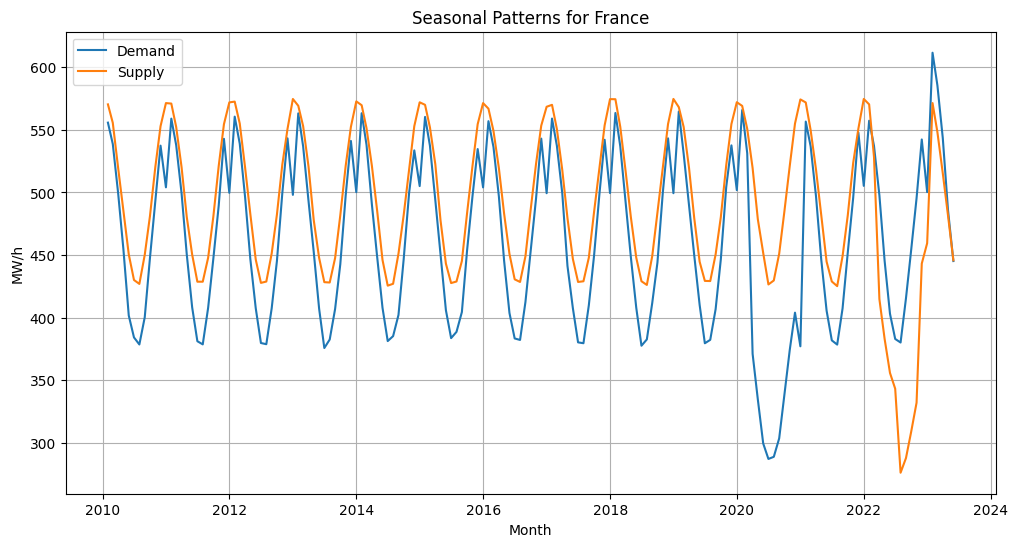

<ipython-input-100-371e1d2b8159>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


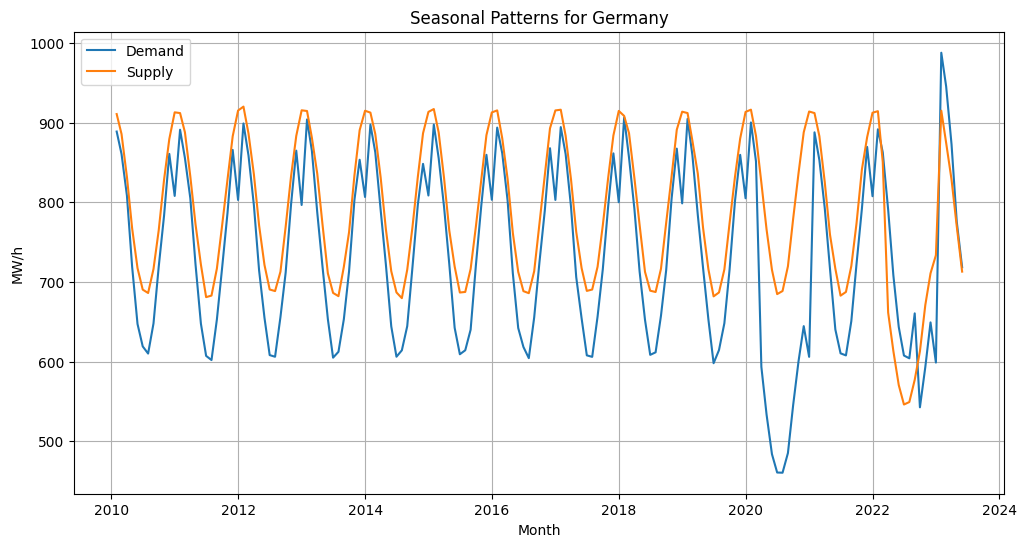

<ipython-input-100-371e1d2b8159>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


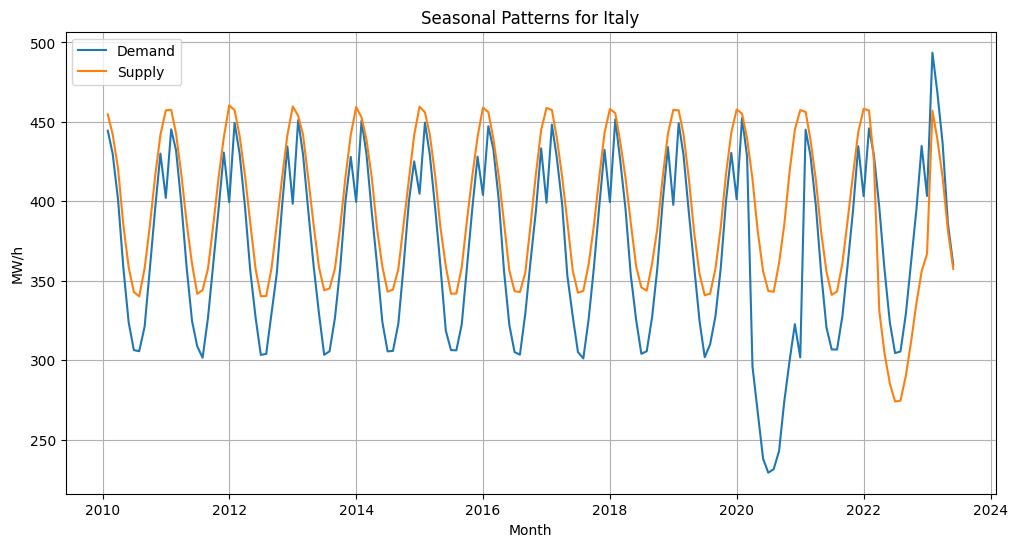

<ipython-input-100-371e1d2b8159>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


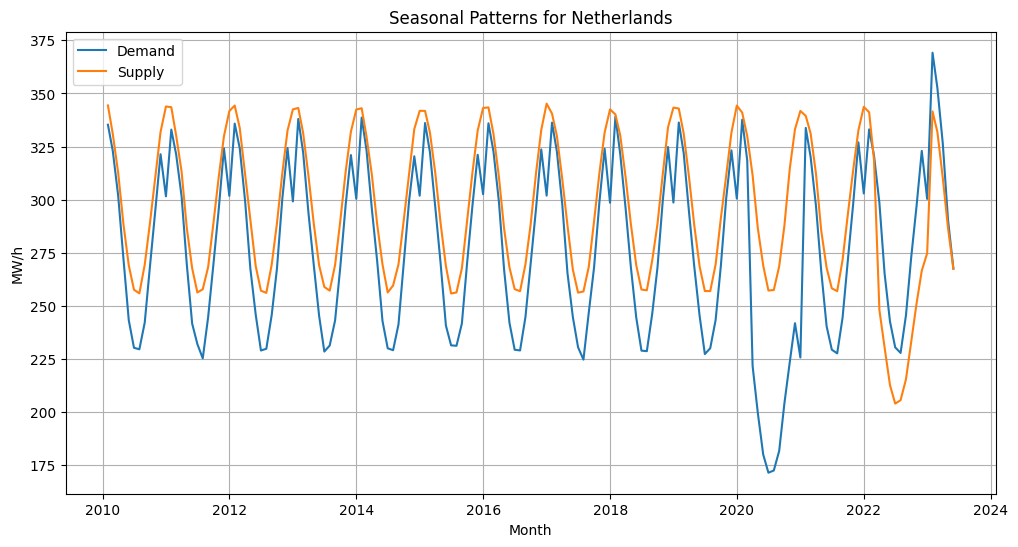

<ipython-input-100-371e1d2b8159>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


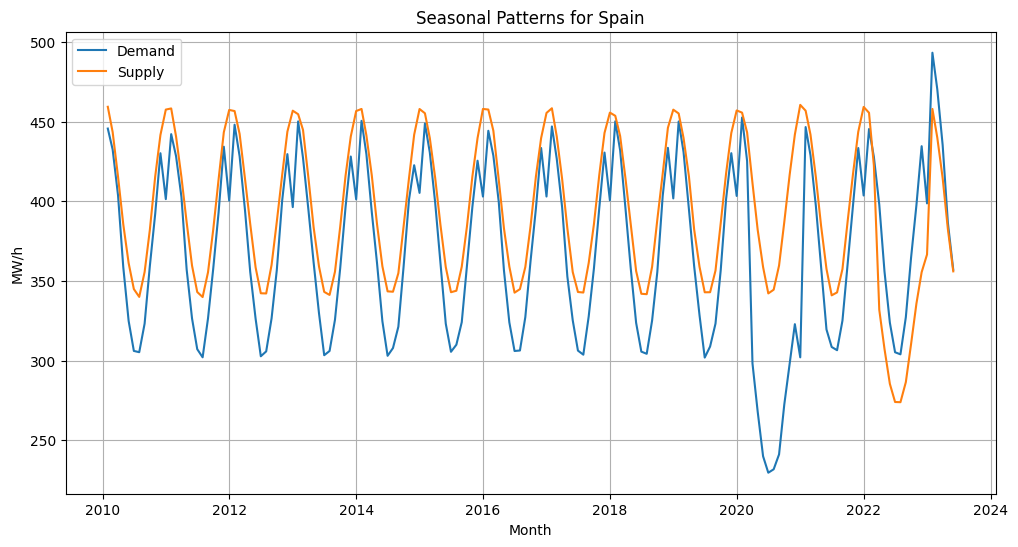

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the countries from the dataset
countries = clean_df['country'].unique()

for country in countries:
    country_data = clean_df[clean_df['country'] == country]

    # Seasonal Patterns
    monthly_mean = country_data.resample('M').mean()
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_mean.index, monthly_mean['demand'], label='Demand')
    plt.plot(monthly_mean.index, monthly_mean['supply'], label='Supply')
    plt.xlabel('Month')
    plt.ylabel('MW/h')
    plt.title(f'Seasonal Patterns for {country}')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Trend Analysis
    trend = country


## Insights from the Graph

- **Seasonality Across Years:** The graph shows the presence of seasonality in power trading across multiple years, except for March 2020. This indicates predictable and repeating patterns in demand and supply.

- **March 2020 Disruption:** March 2020 experienced a significant disruption in power trading, with decreased demand and increased difference between demand and supply. This disruption can be attributed to factors like the COVID-19 pandemic.

- **Change in Pattern in 2022:** In 2022, a notable shift in the power trading pattern occurred, with decreased supply  compared to previous years. This suggests a change in market dynamics or underlying factors influencing supply and demand.

<ipython-input-101-cd64c6b53c54>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


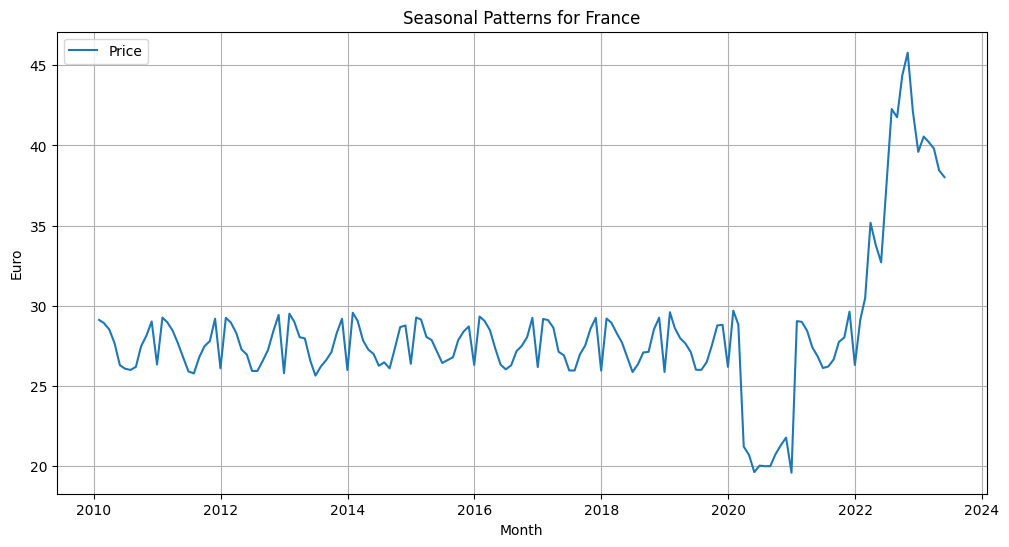

<ipython-input-101-cd64c6b53c54>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


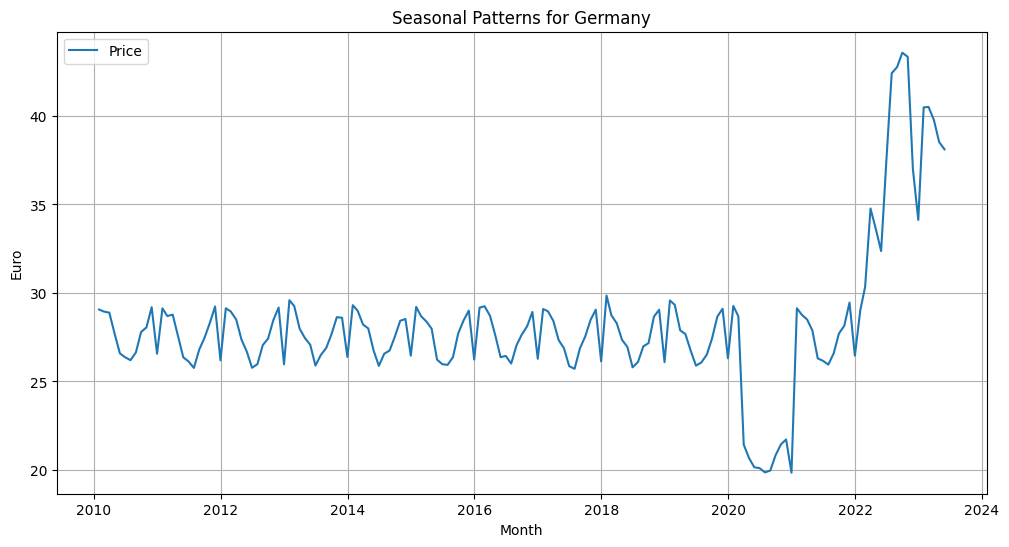

<ipython-input-101-cd64c6b53c54>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


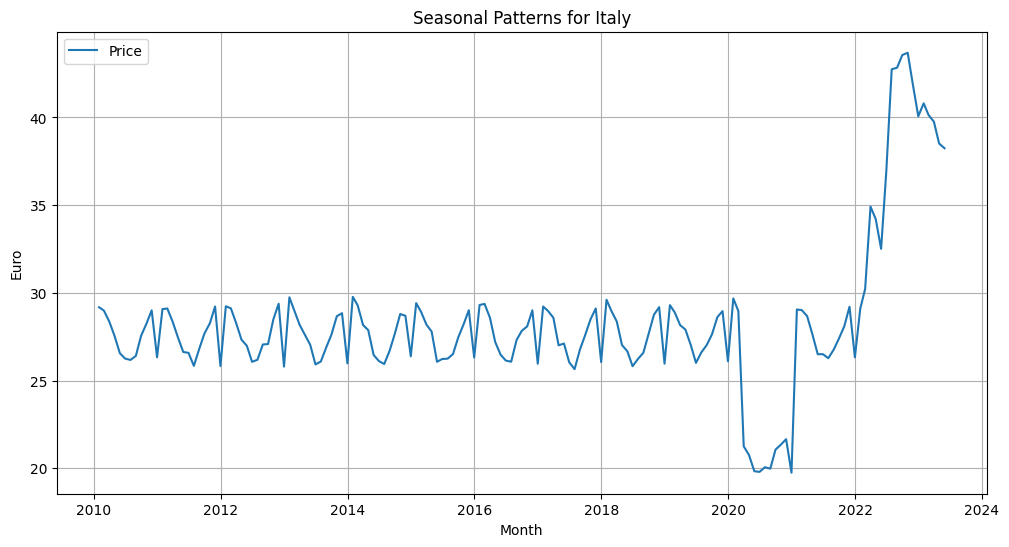

<ipython-input-101-cd64c6b53c54>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


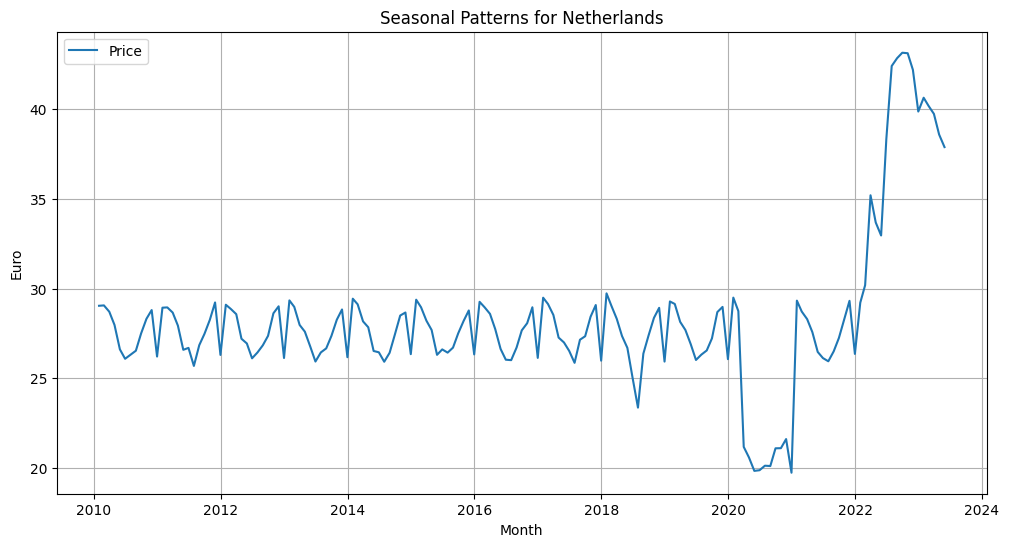

<ipython-input-101-cd64c6b53c54>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = country_data.resample('M').mean()


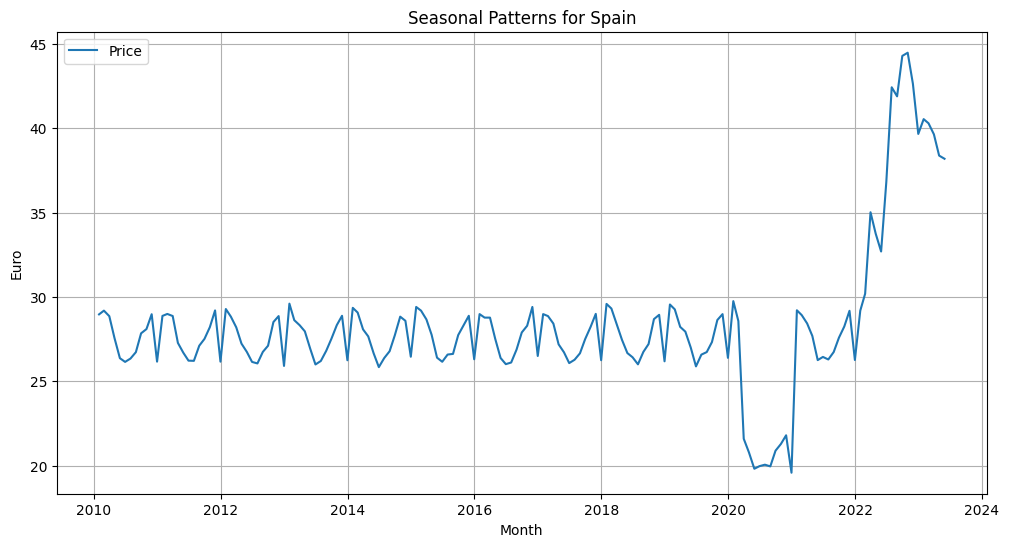

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the countries from the dataset
countries = clean_df['country'].unique()

for country in countries:
    country_data = clean_df[clean_df['country'] == country]

    # Seasonal Patterns
    monthly_mean = country_data.resample('M').mean()
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_mean.index, monthly_mean['price'], label='Price')
    plt.xlabel('Month')
    plt.ylabel('Euro')
    plt.title(f'Seasonal Patterns for {country}')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Trend Analysis
    trend = country


## Insights from the Graph

- **Seasonality Across Years:** The graph shows the presence of seasonality in power trading across multiple years, except for March 2020. This indicates predictable and repeating patterns in demand and supply.

- **March 2020 Disruption:** March 2020 experienced a significant disruption in power trading, with decreased demand and increased difference between demand and supply. This disruption can be attributed to factors like the COVID-19 pandemic.

- **Change in Pattern in 2022:** In 2022, a notable shift in the power trading pattern occurred, with decreased supply and increased demand compared to previous years. This suggests a change in market dynamics or underlying factors influencing supply and demand.

- **Price Fluctuations:** Power prices exhibited significant fluctuations over time. After 2022, prices increased sharply, while they declined in 2020. These fluctuations may be influenced by market conditions, energy imbalances, regulatory policies, or shifts in the generation mix.

These insights emphasize the presence of seasonality, the disruption in March 2020, changes in supply and demand dynamics in 2022, and notable price fluctuations in the power trading domain. Understanding these patterns is essential for informed decision-making and effective risk management in power trading.


<ipython-input-102-33e6d15ca35f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-102-33e6d15ca35f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_week_mean = country_data.groupby('day_of_week').mean()


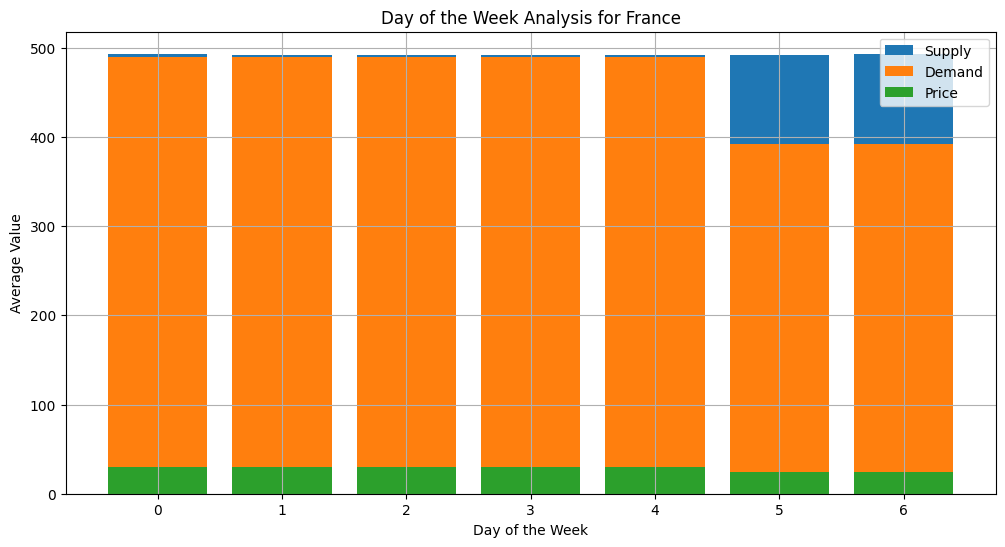

<ipython-input-102-33e6d15ca35f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-102-33e6d15ca35f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_week_mean = country_data.groupby('day_of_week').mean()


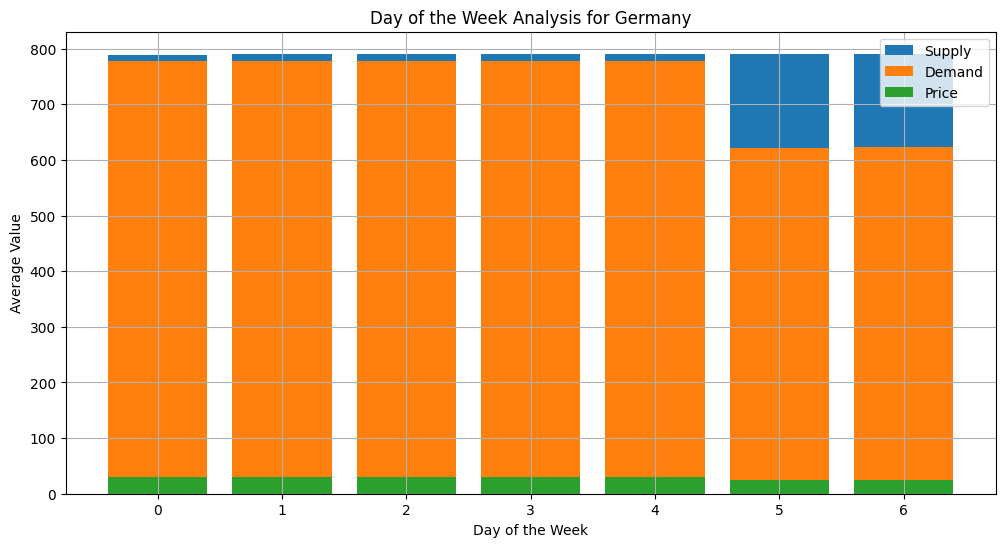

<ipython-input-102-33e6d15ca35f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-102-33e6d15ca35f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_week_mean = country_data.groupby('day_of_week').mean()


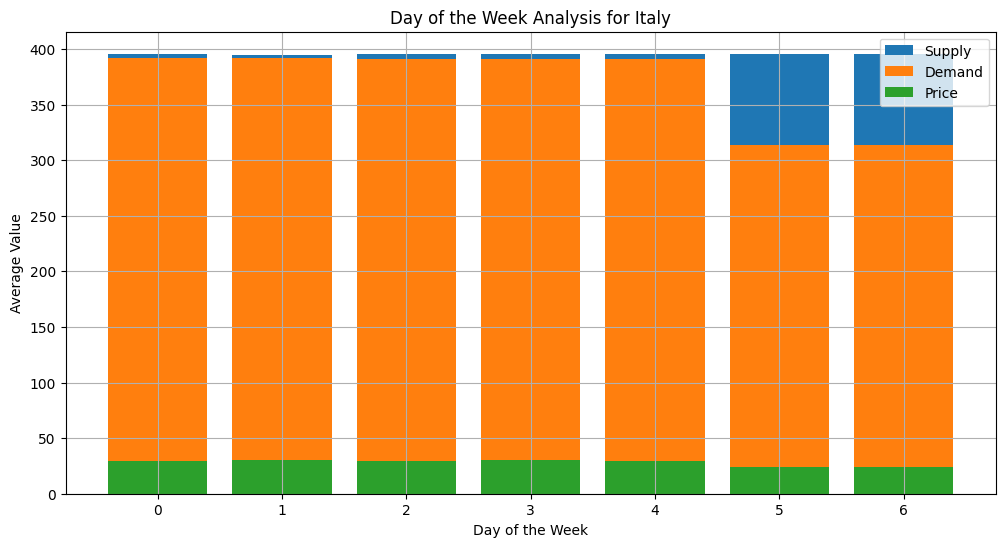

<ipython-input-102-33e6d15ca35f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-102-33e6d15ca35f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_week_mean = country_data.groupby('day_of_week').mean()


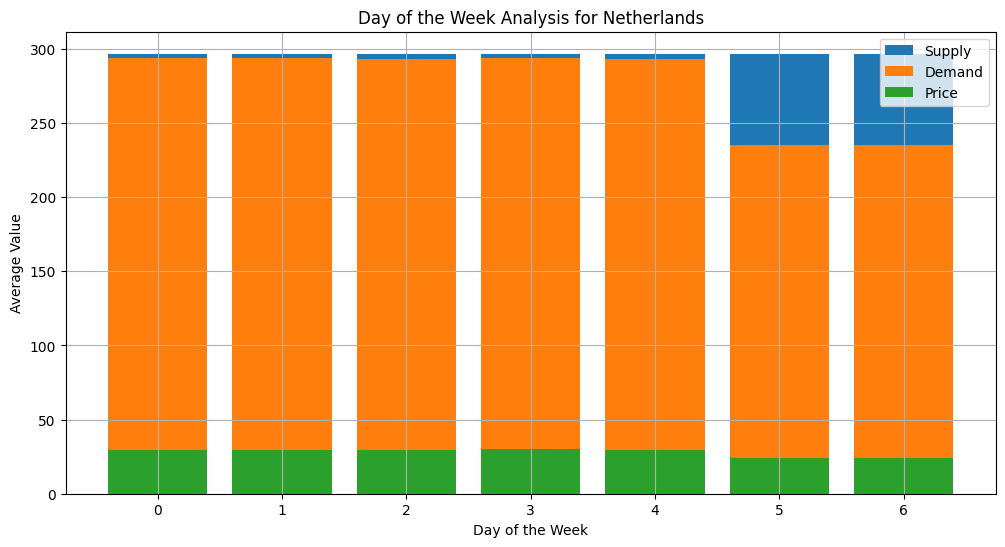

<ipython-input-102-33e6d15ca35f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-102-33e6d15ca35f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_week_mean = country_data.groupby('day_of_week').mean()


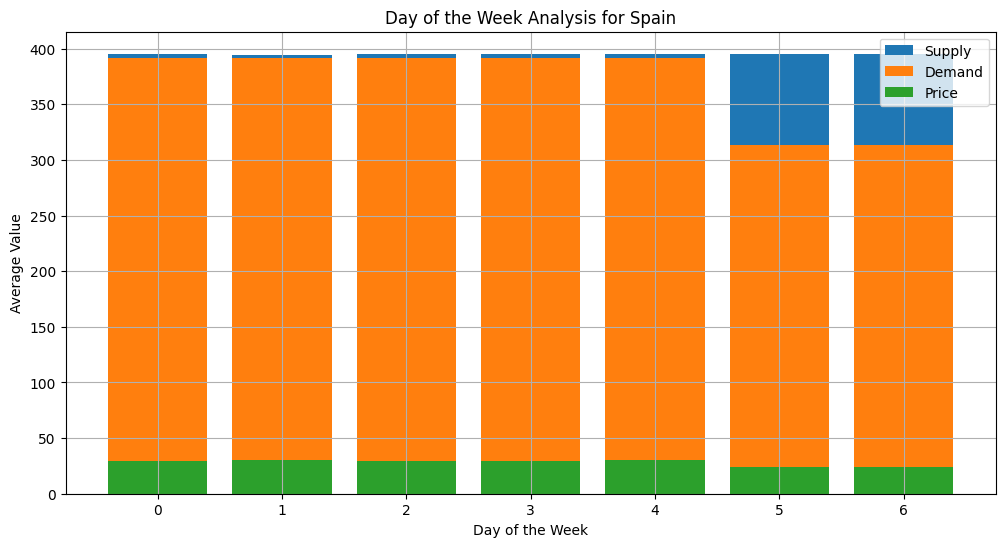

In [ ]:
for country in countries:
    country_data = clean_df[clean_df['country'] == country]

    # Day of the Week Analysis
    country_data['day_of_week'] = country_data.index.dayofweek
    day_of_week_mean = country_data.groupby('day_of_week').mean()
    plt.figure(figsize=(12, 6))
    plt.bar(day_of_week_mean.index, day_of_week_mean['supply'], label='Supply')
    plt.bar(day_of_week_mean.index, day_of_week_mean['demand'], label='Demand')
    plt.bar(day_of_week_mean.index, day_of_week_mean['price'], label='Price')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Value')
    plt.title(f'Day of the Week Analysis for {country}')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Trend Analysis
    trend = country


## Weekend Demand and Electricity Prices in the Power Trading Domain

From the above graph, it is evident that the demand for electricity was significantly lower on weekends compared to normal weekdays. This observation can be attributed to the closure of offices and industries during weekends, leading to a decrease in electricity consumption.

In the context of power trading, this lower demand during weekends can have an impact on electricity prices. With reduced demand, the market forces of supply and demand can result in **lower electricity prices** during these periods. The decreased electricity consumption during weekends creates a surplus in the power market, which can lead to a decrease in prices.

Power traders and market participants can leverage this insight to strategize their trading activities. They can take advantage of the **lower electricity prices** during weekends by potentially buying electricity at lower rates and reselling it during weekdays when demand and prices are higher. This strategy allows traders to capitalize on the price differentials and potentially maximize their profitability.

Understanding the relationship between demand, electricity prices, and temporal factors such as weekends is crucial in the power trading domain. By monitoring and analyzing these patterns, traders can make informed decisions, optimize their trading strategies, and navigate the dynamics of the electricity market effectively.


## Correlations:

- Explore the correlations between different variables.
- For example, you can examine the relationship between demand and price or supply and price to understand how they influence each othe

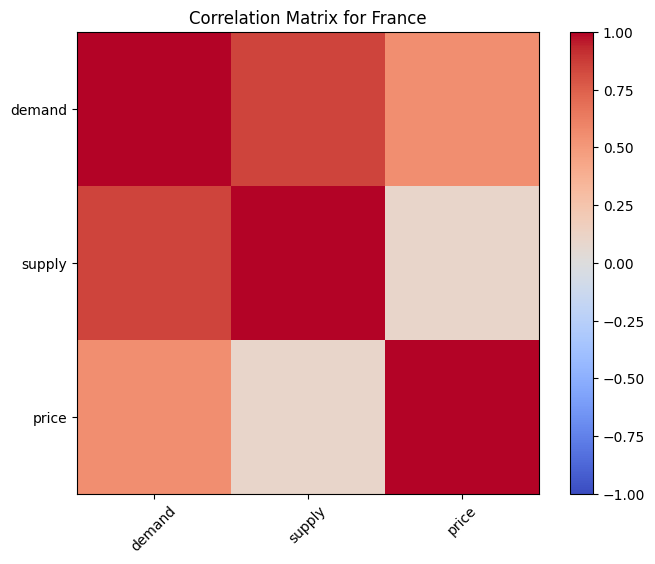

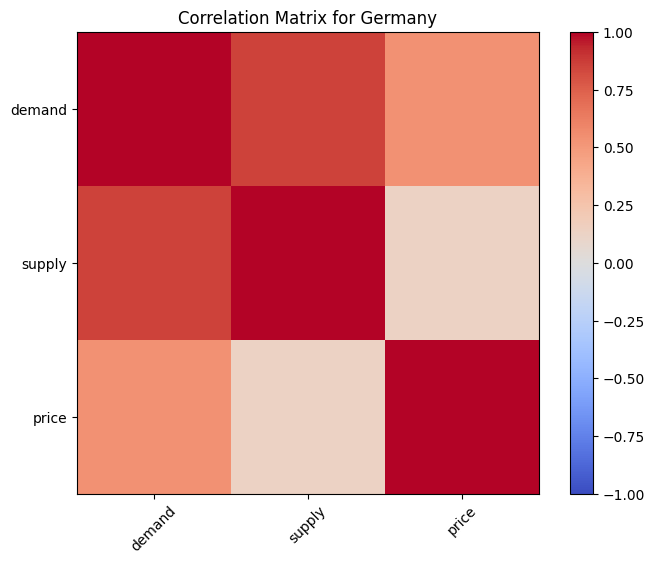

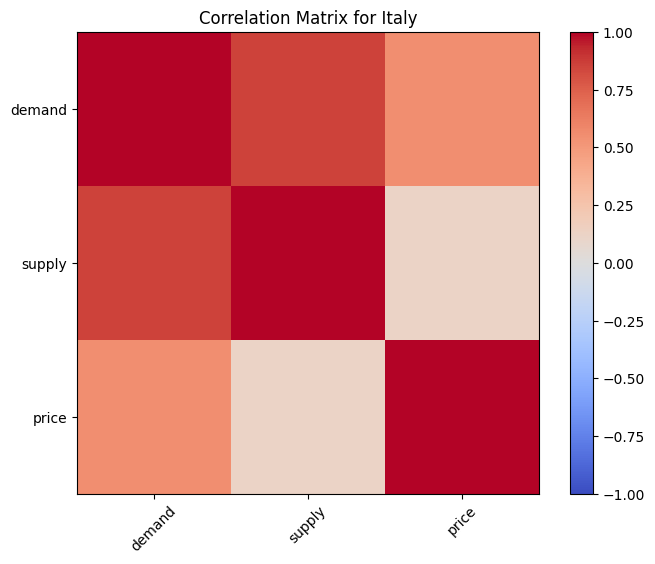

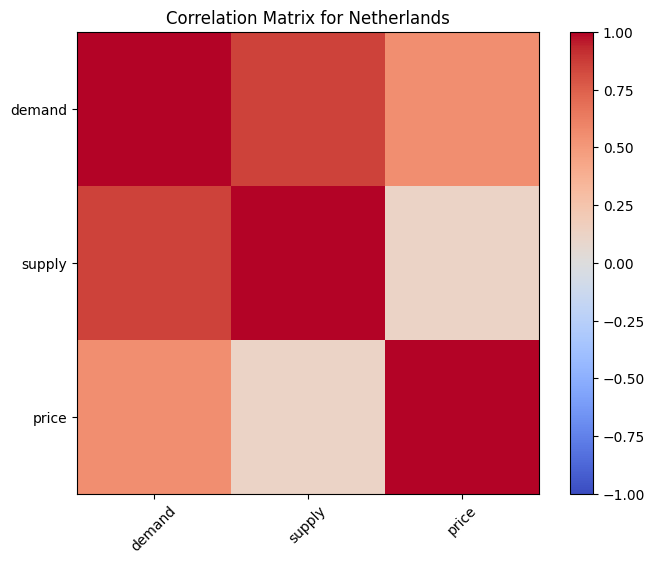

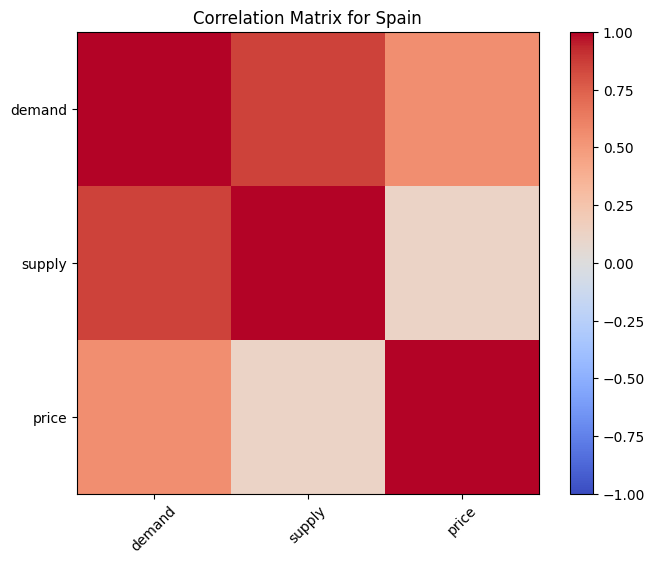

In [ ]:
for country in countries:
    country_data = clean_df[clean_df['country'] == country]
    # Correlation Analysis
    correlation_matrix = country_data[['demand', 'supply', 'price']].corr()
    plt.figure(figsize=(8, 6))
    plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title(f'Correlation Matrix for {country}')
    plt.show()

    # Trend Analysis
    trend = country


## Insights from the correlation matrix in the Power Trading Domain

Based on the correlation matrix analysis in the power trading domain, the following insights have been observed:

- **Demand and Supply:** There is a clear correlation seen between the demand and supply of power across different countries. This indicates that as the demand for power increases or decreases in a particular country, there is a corresponding change in the supply of power. This correlation suggests that the power trading activities are influenced by the balance between demand and supply in the respective countries.

- **Prices:** However, there is no significant correlation observed between the prices of power and other variables in the dataset. This implies that the prices of power in the power trading market are not directly influenced by the demand or supply factors across countries. Other factors, such as market dynamics, regulatory policies, or external market forces, may play a more prominent role in determining the prices of power in the trading domain.

These insights highlight the importance of understanding the dynamics of demand, supply, and pricing in the power trading domain. While demand and supply show a clear correlation, the pricing mechanism appears to be influenced by other factors beyond the immediate relationship with demand and supply.

It is important for stakeholders in the power trading industry to consider these insights when formulating trading strategies, managing risks, and making informed decisions related to power trading activities. Further analysis and investigation into the specific factors affecting power prices in the market would be beneficial for a deeper understanding of the pricing dynamics in the power trading domain.


**Cross-Country Comparisons:** Compare the demand, supply, and price patterns between different countries.


['France']
[46.7032955631739]
[9.4590588831543]
[28.279042970742488]
['France', 'Germany']
[46.7032955631739, 46.52277386389429]
[9.4590588831543, 9.57476221207361]
[28.279042970742488, 28.2085961018491]
['France', 'Germany', 'Italy']
[46.7032955631739, 46.52277386389429, 46.63348057803537]
[9.4590588831543, 9.57476221207361, 9.51979338398476]
[28.279042970742488, 28.2085961018491, 28.288792973741998]
['France', 'Germany', 'Italy', 'Netherlands']
[46.7032955631739, 46.52277386389429, 46.63348057803537, 46.68449751625905]
[9.4590588831543, 9.57476221207361, 9.51979338398476, 9.496457170644875]
[28.279042970742488, 28.2085961018491, 28.288792973741998, 28.24901623048429]
['France', 'Germany', 'Italy', 'Netherlands', 'Spain']
[46.7032955631739, 46.52277386389429, 46.63348057803537, 46.68449751625905, 46.66858155181485]
[9.4590588831543, 9.57476221207361, 9.51979338398476, 9.496457170644875, 9.526724902467622]
[28.279042970742488, 28.2085961018491, 28.288792973741998, 28.24901623048429, 28

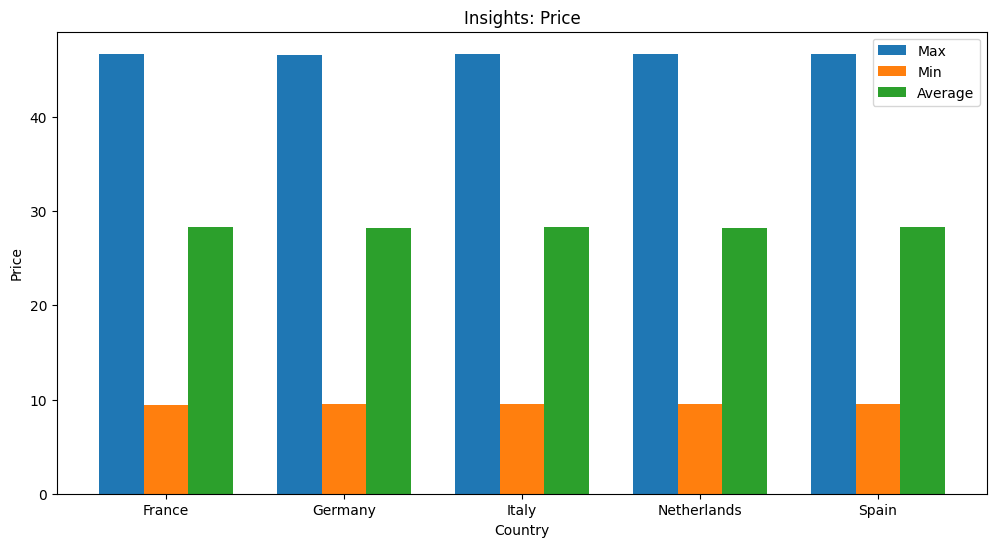

In [ ]:
import numpy as np
# Analyze cross-country comparisons
for variable in ['price']:
    # Empty lists to store insights and country names
    max_values = []
    min_values = []
    avg_values = []
    country_names = []

    # Calculate insights for each country
    for country in countries:
        # Filter data for the specific country and variable
        country_data = clean_df[clean_df['country'] == country]
        values = country_data[variable]

        # Calculate insights
        max_value = values.max()
        min_value = values.min()
        avg_value = values.mean()

        # Store insights and country name
        max_values.append(max_value)
        min_values.append(min_value)
        avg_values.append(avg_value)
        country_names.append(country)
        print(country_names)
        print(max_values)
        print(min_values)
        print(avg_values)

    # Plot insights in a bar chart
    x = np.arange(len(country_names))
    width = 0.25

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width, max_values, width, label='Max')
    ax.bar(x, min_values, width, label='Min')
    ax.bar(x + width, avg_values, width, label='Average')

    ax.set_xlabel('Country')
    ax.set_ylabel(variable.capitalize())
    ax.set_title(f'Insights: {variable.capitalize()}')
    ax.set_xticks(x)
    ax.set_xticklabels(country_names)
    ax.legend()

    plt.show()


We can clearly see that from the cross country comparision the prices were same across the country

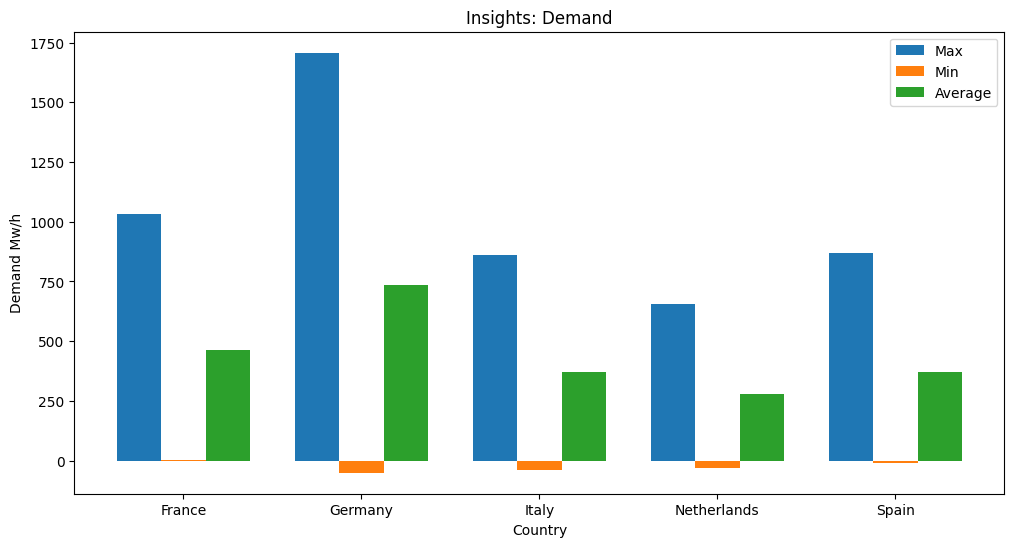

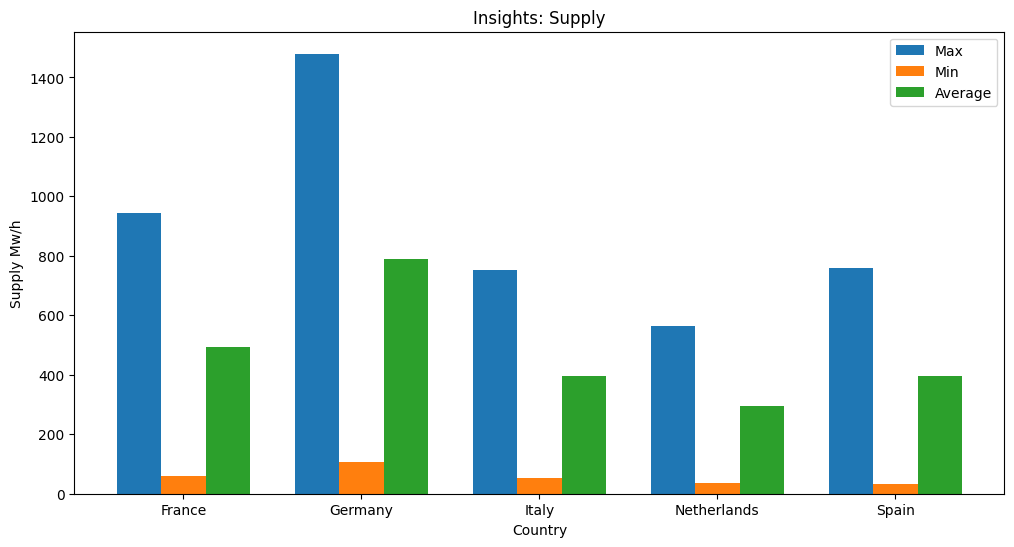

In [ ]:
import numpy as np
# Analyze cross-country comparisons
for variable in ['demand', 'supply']:
    # Empty lists to store insights and country names
    max_values = []
    min_values = []
    avg_values = []
    country_names = []

    # Calculate insights for each country
    for country in countries:
        # Filter data for the specific country and variable
        country_data = clean_df[clean_df['country'] == country]
        values = country_data[variable]

        # Calculate insights
        max_value = values.max()
        min_value = values.min()
        avg_value = values.mean()

        # Store insights and country name
        max_values.append(max_value)
        min_values.append(min_value)
        avg_values.append(avg_value)
        country_names.append(country)

    # Plot insights in a bar chart
    x = np.arange(len(country_names))
    width = 0.25

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width, max_values, width, label='Max')
    ax.bar(x, min_values, width, label='Min')
    ax.bar(x + width, avg_values, width, label='Average')

    ax.set_xlabel('Country')
    ax.set_ylabel(variable.capitalize()+' '+'Mw/h')
    ax.set_title(f'Insights: {variable.capitalize()}')
    ax.set_xticks(x)
    ax.set_xticklabels(country_names)
    ax.legend()

    plt.show()


## Cross-Country Power Trading Insights

1. Demand and Supply:
   - **Germany exhibited the highest demand and supply** in the cross-country comparison within the power trading domain.
   - Following Germany, France, Italy, Spain, and the Netherlands demonstrated comparatively lower levels of demand and supply.

2. Price Uniformity:
   - The analysis revealed that **the prices remained consistent across the countries** in the power trading market.
   - Regardless of the variations in demand and supply, the prices remained the same, indicating a uniform pricing structure.

These insights highlight the **dominance of Germany in terms of demand and supply** within the power trading domain, with other countries like France, Italy, Spain, and the Netherlands following suit. Moreover, the observation of **uniform prices across the countries** suggests a consistent pricing mechanism in the power trading market.

These findings provide valuable information for stakeholders in the power trading industry, aiding their understanding of the relative market positions and pricing dynamics across different countries.


### **Comparision** :Price vs diferrenece between Supply and Demand

Corelation Analysis

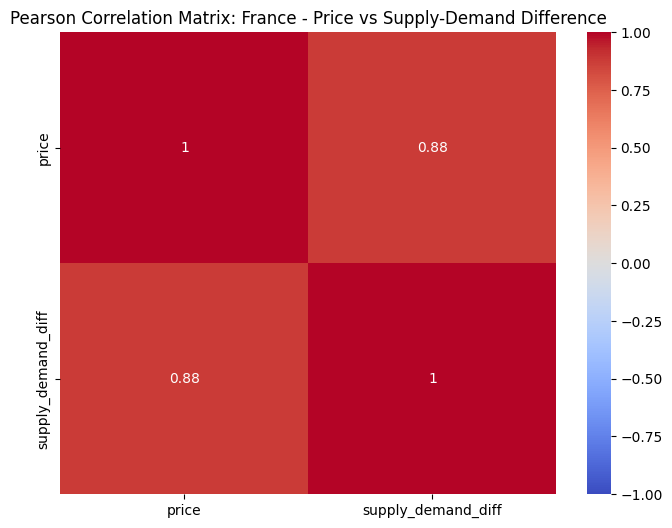

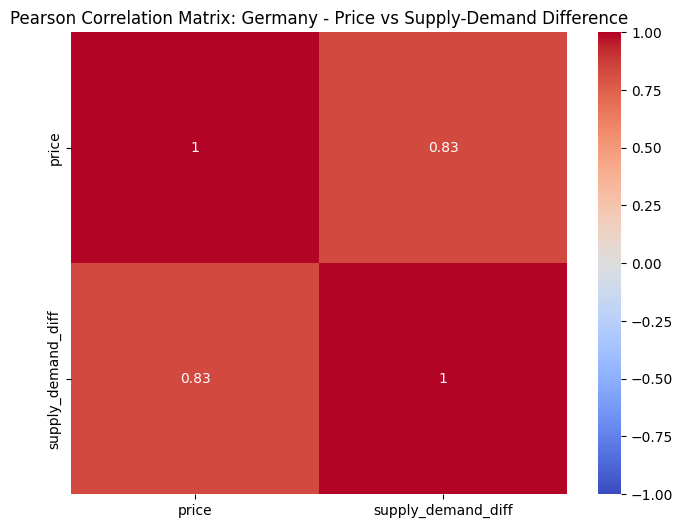

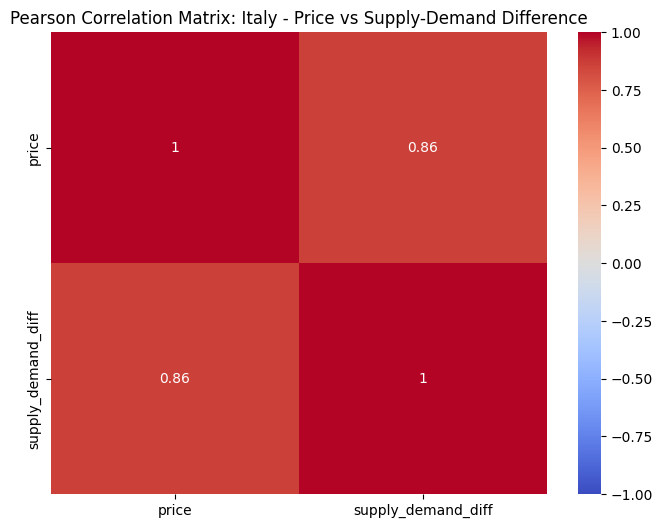

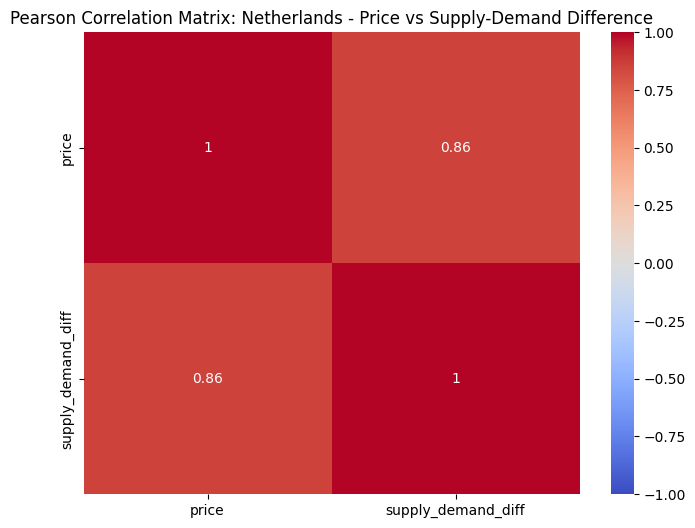

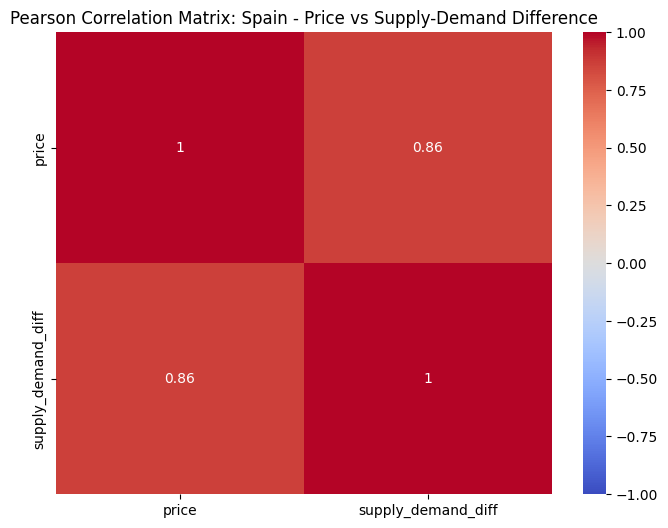

In [ ]:
import pandas as pd
import seaborn as sns

# Calculate the difference between supply and demand
clean_df['supply_demand_diff'] = clean_df['demand']-clean_df['supply']

# Extract the countries from the dataset
countries = clean_df['country'].unique()

# Iterate over each country
for country in countries:
    # Filter data for the specific country
    country_data = clean_df[clean_df['country'] == country]

    # Calculate the Pearson correlation matrix
    corr_matrix = country_data[['price', 'supply_demand_diff']].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Pearson Correlation Matrix: {country} - Price vs Supply-Demand Difference")
    plt.show()


## Insights on Price and the Difference of Demand and Supply in Power Trading Domain

- **We discovered a strong correlation** between the price of power and the difference between demand and supply across various countries.

- This finding **indicates a significant association** between price and the demand-supply gap in the power trading market.

- The observed correlation **transcends geographical boundaries**, suggesting a universal relationship between price and the difference of demand and supply in the power trading sector.

- Participants in the power trading domain can leverage this insight to make informed decisions on **pricing strategies, supply management, and demand forecasting**.

- Understanding the **strong correlation** between price and the difference of demand and supply empowers stakeholders to navigate market fluctuations and optimize trading activities.

- These insights provide a valuable foundation for **strategic decision-making** within the power trading domain, enabling market participants to **adapt and achieve favorable outcomes** in response to changing conditions.

These findings highlight the importance of considering the relationship between price and the difference of demand and supply in the power trading domain. By leveraging this understanding, market participants can make more informed decisions and effectively respond to market dynamics for better outcomes.


<ipython-input-111-e5d90089175b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-111-e5d90089175b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-111-e5d90089175b>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

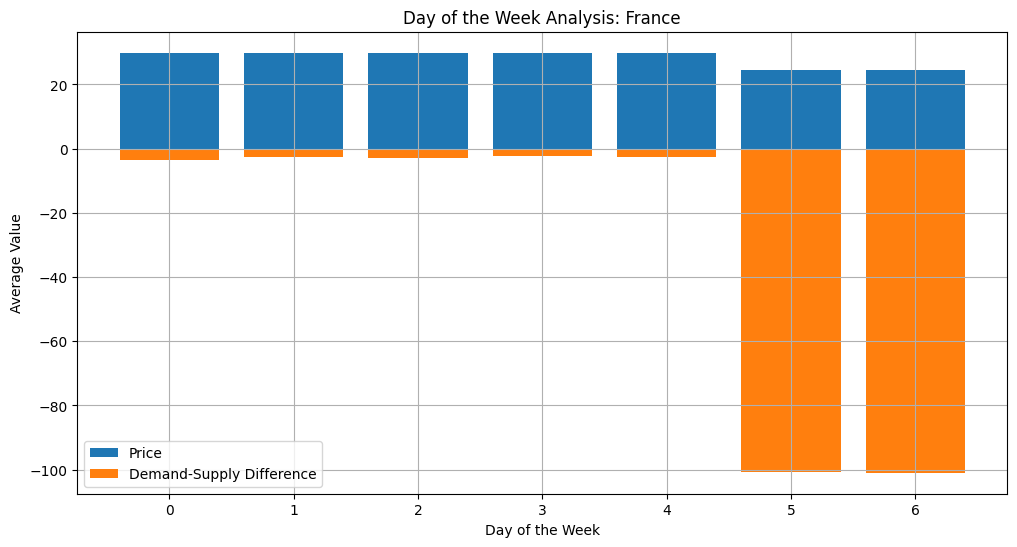

<ipython-input-111-e5d90089175b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-111-e5d90089175b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-111-e5d90089175b>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

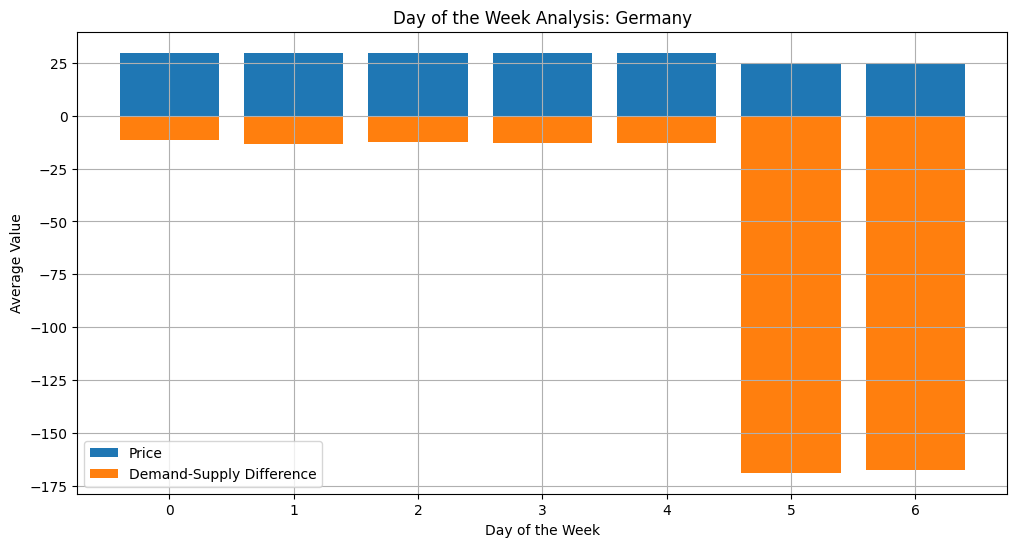

<ipython-input-111-e5d90089175b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-111-e5d90089175b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-111-e5d90089175b>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

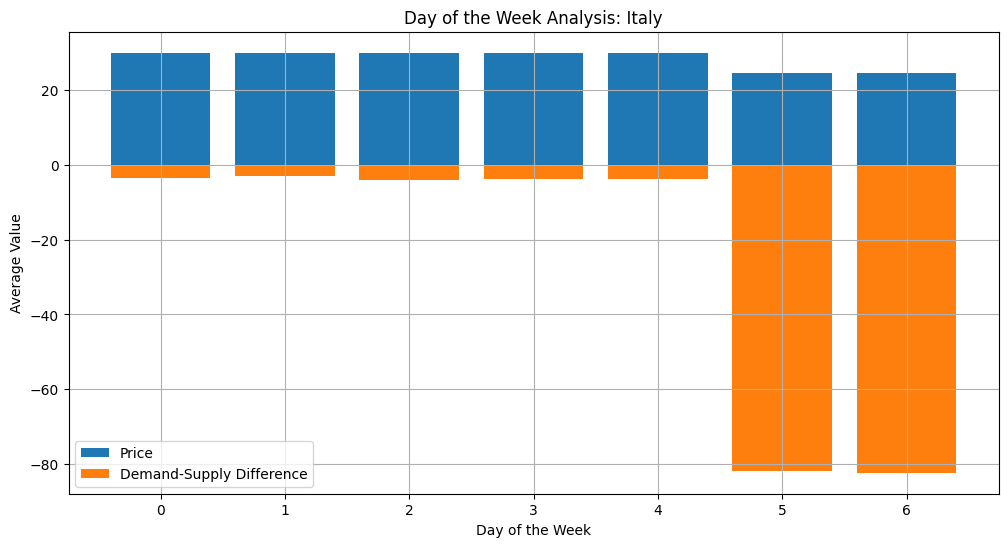

<ipython-input-111-e5d90089175b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-111-e5d90089175b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-111-e5d90089175b>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

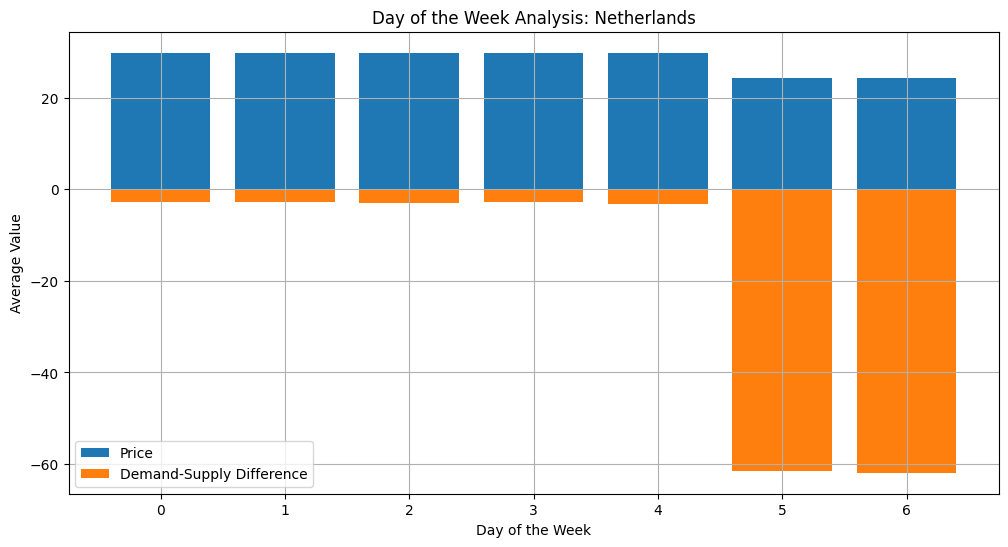

<ipython-input-111-e5d90089175b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-111-e5d90089175b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['day_of_week'] = country_data.index.dayofweek
<ipython-input-111-e5d90089175b>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

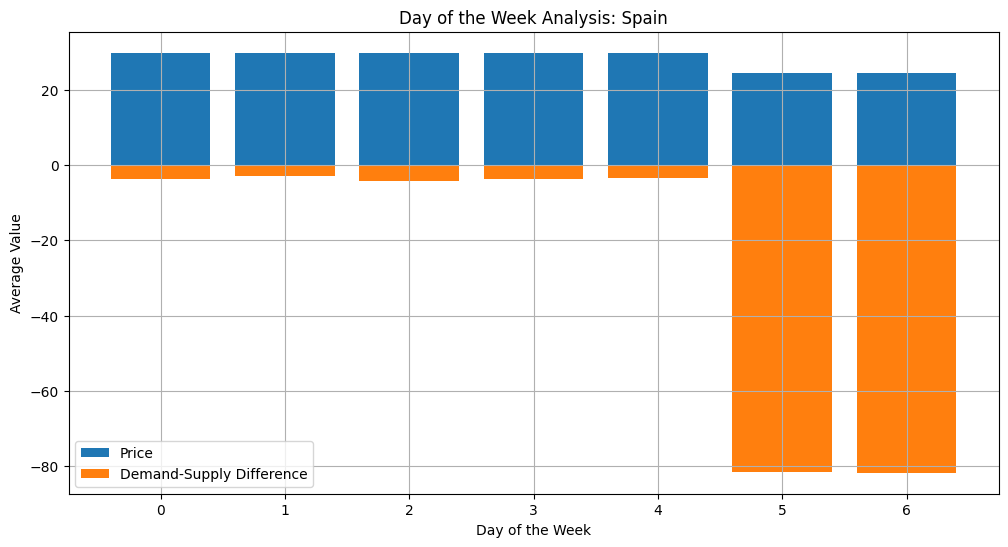

In [ ]:
# Iterate over each country
for country in countries:
    # Filter data for the specific country
    country_data = clean_df[clean_df['country'] == country]

    # Calculate the difference between demand and supply
    country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']


    # Day of the Week Analysis
    country_data['day_of_week'] = country_data.index.dayofweek
    day_of_week_mean = country_data.groupby('day_of_week').mean()
    plt.figure(figsize=(12, 6))
    plt.bar(day_of_week_mean.index, day_of_week_mean['price'], label='Price')
    plt.bar(day_of_week_mean.index, day_of_week_mean['demand_supply_diff'], label='Demand-Supply Difference')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Value')
    plt.title(f'Day of the Week Analysis: {country}')
    plt.legend()
    plt.grid(True)
    plt.show()


## Insights from the Graph: Weekend Demand, Supply, and Price Dynamics in the Power Trading Domain

From the graph analysis in the power trading domain, several key insights can be derived:

1. **Weekend Effect:** The graph clearly illustrates a significant difference in demand, supply, and price dynamics during weekends compared to weekdays. Specifically, there is noticeably lower demand for power during weekends.

2. **Decreased Demand:** On weekends, the power demand experiences a considerable decrease. This reduction in demand is likely due to lower industrial and commercial activities, as many businesses operate on a reduced schedule or are closed during weekends. Residential consumption patterns may also contribute to the lower overall demand.

3. **Surplus Supply:** The graph indicates a surplus of power supply during weekends. This surplus supply can be attributed to the reduced demand, coupled with the fact that power generation systems may not be scaled back during these periods. As a result, there is an excess supply of power available in the market.

4. **Impact on Price:** The combination of lower demand and surplus supply during weekends exerts downward pressure on the power prices. With reduced competition for limited power resources, the market prices for power tend to decrease during weekends compared to weekdays.

These insights highlight the importance of considering the temporal aspect, particularly the distinction between weekdays and weekends, when analyzing power trading data. Understanding the fluctuation in demand, supply, and prices during different time periods enables market participants to make informed decisions, optimize resource allocation, and devise effective trading strategies.

In the power trading domain, recognizing and leveraging the weekend effect can be valuable for market participants, including power generators, traders, and grid operators, as it allows them to anticipate and adapt to the distinctive dynamics of weekend power markets.


<ipython-input-112-8bc75a2c0184>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-112-8bc75a2c0184>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['hour_of_day'] = country_data.index.hour
<ipython-input-112-8bc75a2c0184>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_o

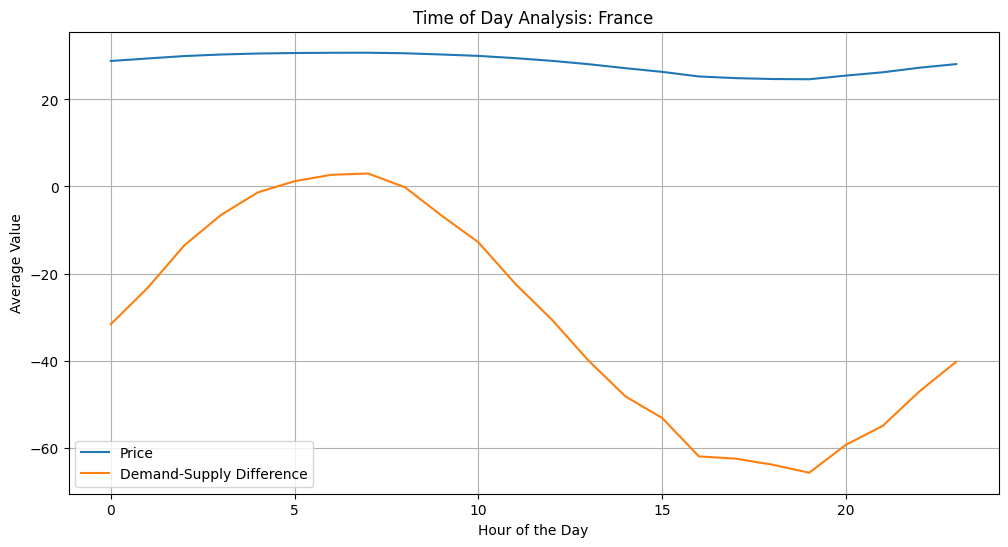

<ipython-input-112-8bc75a2c0184>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-112-8bc75a2c0184>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['hour_of_day'] = country_data.index.hour
<ipython-input-112-8bc75a2c0184>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_o

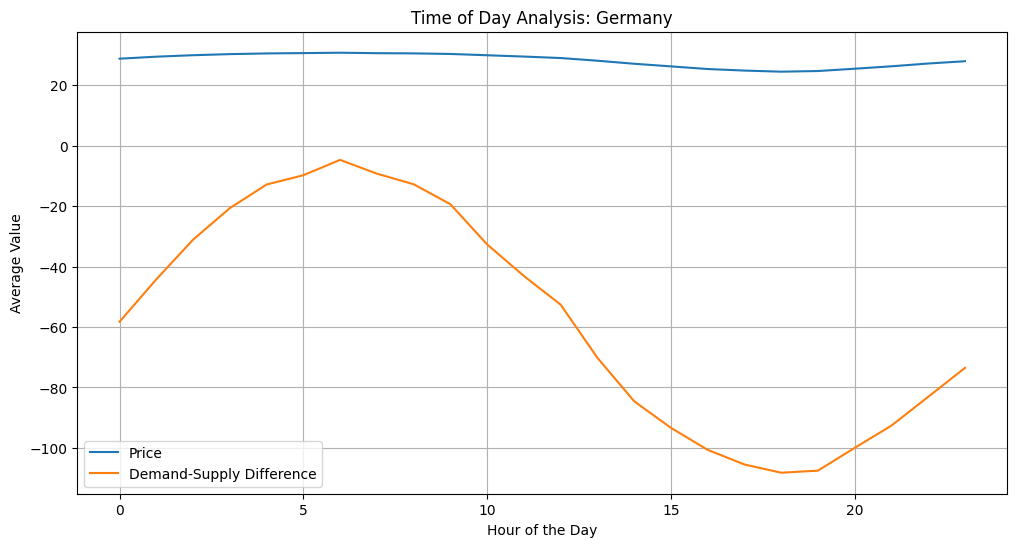

<ipython-input-112-8bc75a2c0184>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-112-8bc75a2c0184>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['hour_of_day'] = country_data.index.hour
<ipython-input-112-8bc75a2c0184>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_o

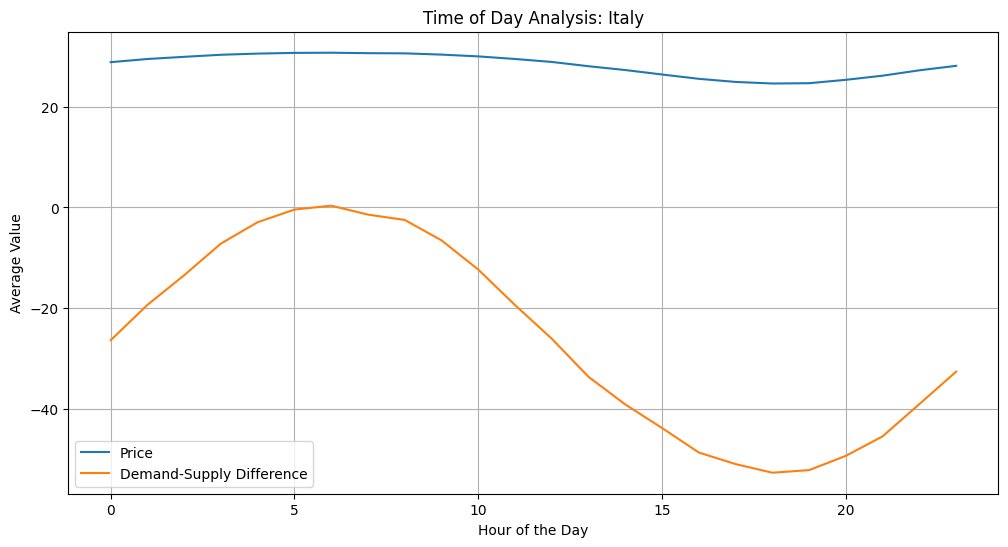

<ipython-input-112-8bc75a2c0184>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-112-8bc75a2c0184>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['hour_of_day'] = country_data.index.hour
<ipython-input-112-8bc75a2c0184>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_o

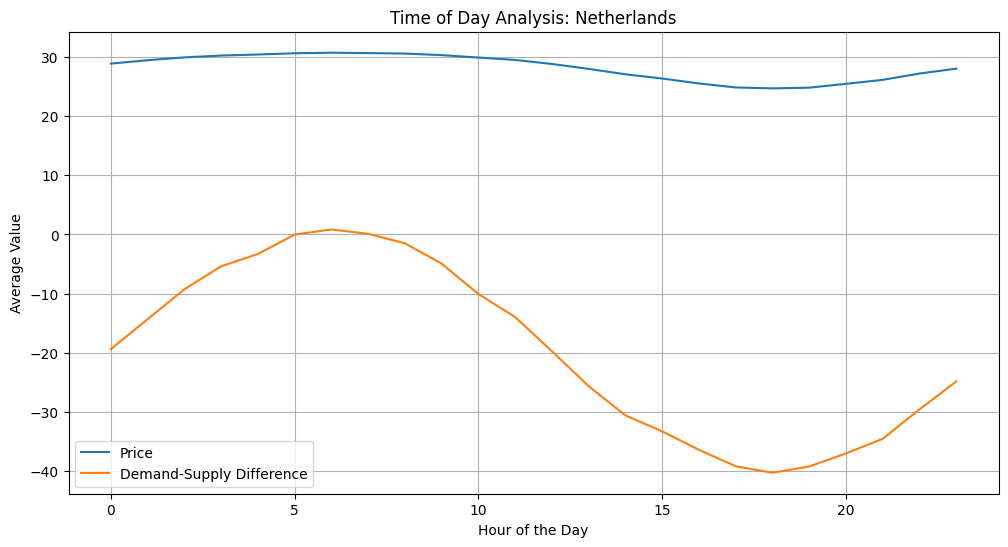

<ipython-input-112-8bc75a2c0184>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']
<ipython-input-112-8bc75a2c0184>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['hour_of_day'] = country_data.index.hour
<ipython-input-112-8bc75a2c0184>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_o

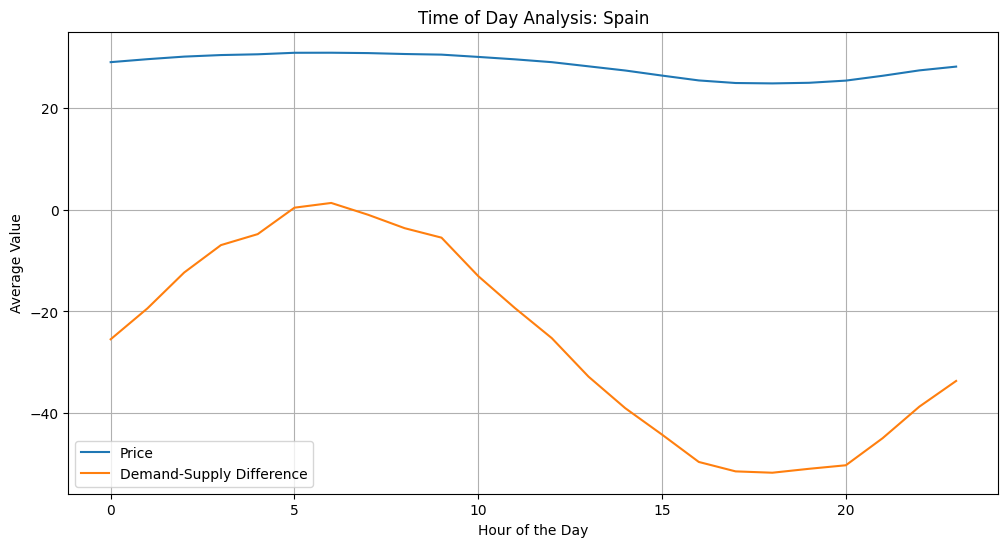

In [ ]:
# Extract the countries from the dataset
countries = clean_df['country'].unique()

# Iterate over each country
for country in countries:
    # Filter data for the specific country
    country_data = clean_df[clean_df['country'] == country]

    # Calculate the difference between demand and supply
    country_data['demand_supply_diff'] = country_data['demand'] - country_data['supply']


    # Time of Day Analysis
    country_data['hour_of_day'] = country_data.index.hour
    hour_of_day_mean = country_data.groupby('hour_of_day').mean()
    plt.figure(figsize=(12, 6))
    plt.plot(hour_of_day_mean.index, hour_of_day_mean['price'], label='Price')
    plt.plot(hour_of_day_mean.index, hour_of_day_mean['demand_supply_diff'], label='Demand-Supply Difference')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Value')
    plt.title(f'Time of Day Analysis: {country}')
    plt.legend()
    plt.grid(True)
    plt.show()




## Time of Day Analysis - Demand-Supply Dynamics in Power Trading

From the analysis of the time of day data in the power trading domain, the following key insights emerge:

- **High Demand, High Prices**: Between 5 am and 8 am, there is a surge in electricity demand, resulting in a scarcity of supply. This drives up the prices, making it the period with the **highest electricity prices**.

- **Reversed Dynamics in the Afternoon**: As the day progresses, the supply of electricity meets or exceeds the demand during the afternoon. This leads to relatively **lower electricity prices** during this time period.

Understanding these demand-supply dynamics and corresponding price fluctuations is crucial in power trading. Market participants can leverage this insight to optimize their trading strategies and manage risk effectively.

Factors beyond demand and supply, such as government regulations, weather conditions, and grid infrastructure, can also influence pricing dynamics in the power trading domain.

*Note: It's important to consider a comprehensive analysis incorporating these factors in conjunction with time of day patterns to gain a more accurate understanding of the power market behavior.*


## Insights in Markdown Format:

- **Insight 1:** In the power trading domain, there was a steep decrease in electricity prices in 2020.
- **Insight 2:** Subsequently, in 2022, there was a sharp increase in electricity prices.

These price fluctuations have significant implications for power traders. The decline in electricity prices in 2020 suggests a period of lower prices, potentially influenced by factors such as changes in energy demand, fuel prices, or government policies.

However, the subsequent surge in prices in 2022 signifies a notable shift in the electricity market dynamics. This rise could be attributed to factors like increased energy consumption, supply constraints, changes in renewable energy generation, or shifts in market conditions.

Understanding these fluctuations is crucial for power traders. By closely monitoring market trends, staying updated with regulations, and employing effective risk management strategies, traders can navigate the volatile electricity market and capitalize on trading opportunities.

Note: Further analysis and validation using appropriate power trading data sources and methodologies may be necessary to fully interpret and leverage these insights effectively.


**Price Fluctuations:** Investigate the factors influencing price fluctuations. Look for any correlations between supply, demand, and price changes. Identify if certain events or time periods result in price volatility.


•	How have different demand, supply and electricity prices changed over time, do you see any connection between the data and global/regional real-world events?

<ipython-input-114-c08707ce421d>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_price = country_data.resample('Y').mean()['price']


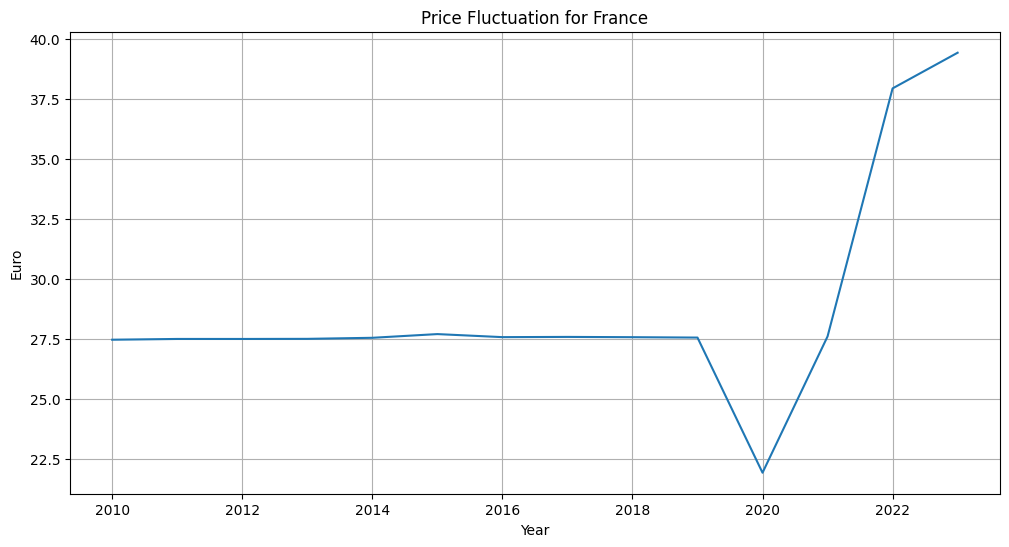

<ipython-input-114-c08707ce421d>:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_demand = country_data.resample('Y').mean()['demand']
<ipython-input-114-c08707ce421d>:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_supply = country_data.resample('Y').mean()['supply']


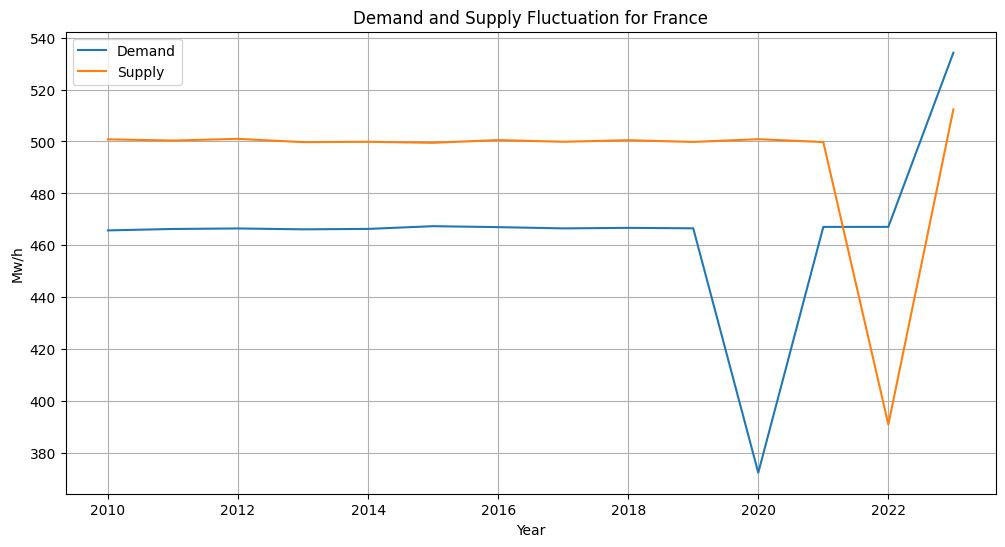

<ipython-input-114-c08707ce421d>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_price = country_data.resample('Y').mean()['price']


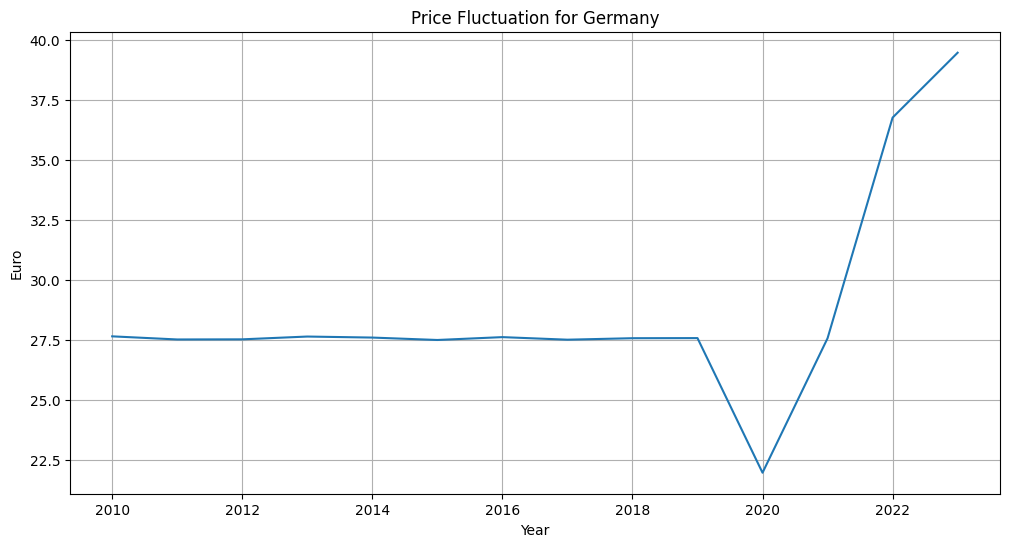

<ipython-input-114-c08707ce421d>:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_demand = country_data.resample('Y').mean()['demand']
<ipython-input-114-c08707ce421d>:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_supply = country_data.resample('Y').mean()['supply']


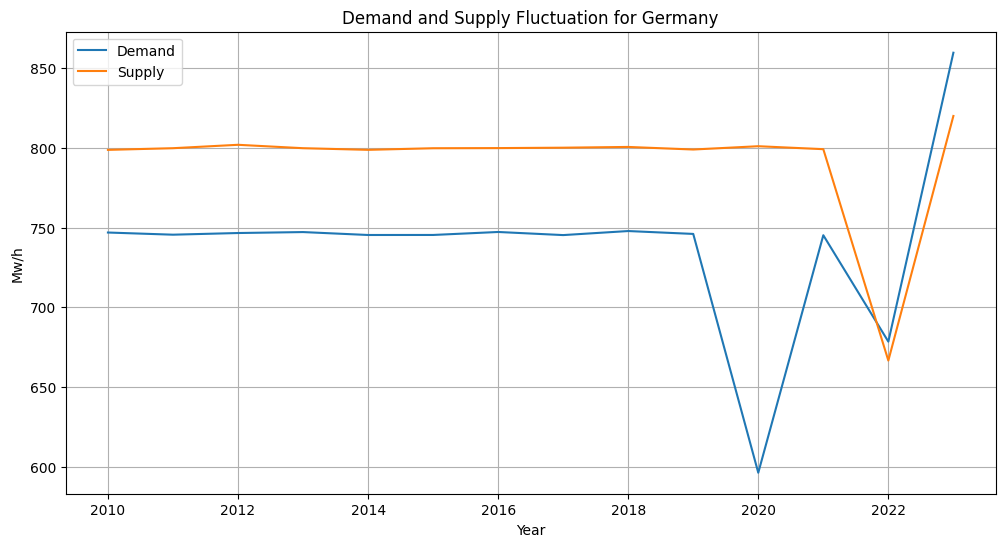

<ipython-input-114-c08707ce421d>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_price = country_data.resample('Y').mean()['price']


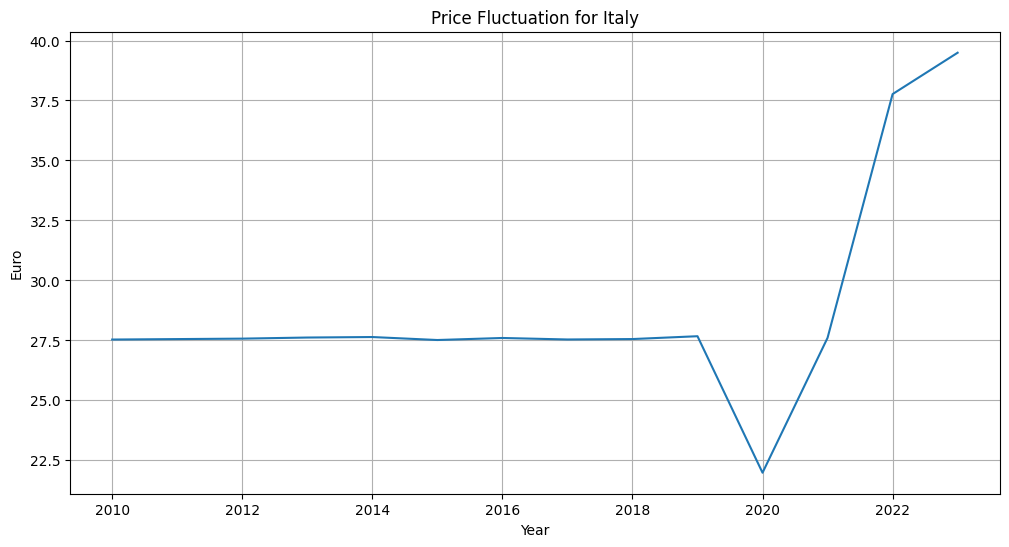

<ipython-input-114-c08707ce421d>:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_demand = country_data.resample('Y').mean()['demand']
<ipython-input-114-c08707ce421d>:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_supply = country_data.resample('Y').mean()['supply']


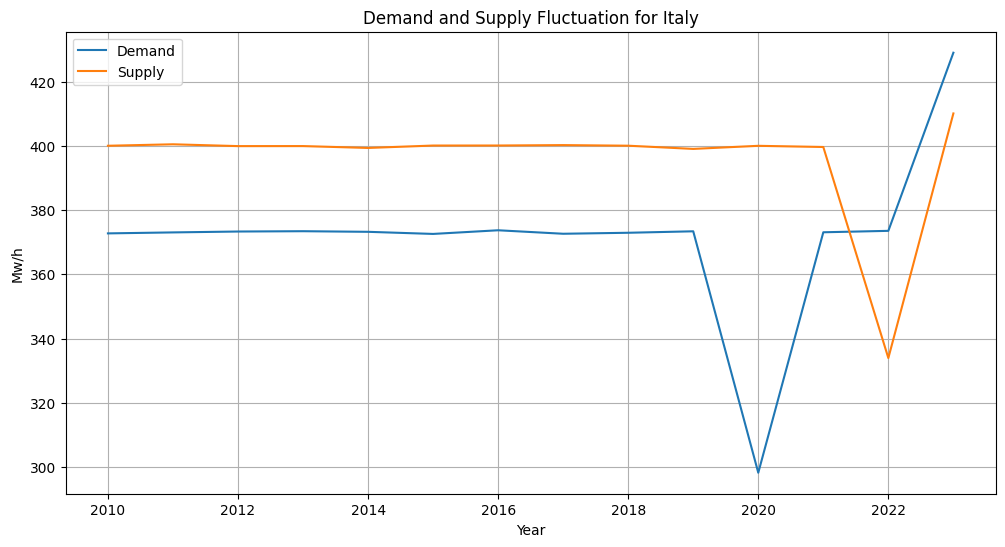

<ipython-input-114-c08707ce421d>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_price = country_data.resample('Y').mean()['price']


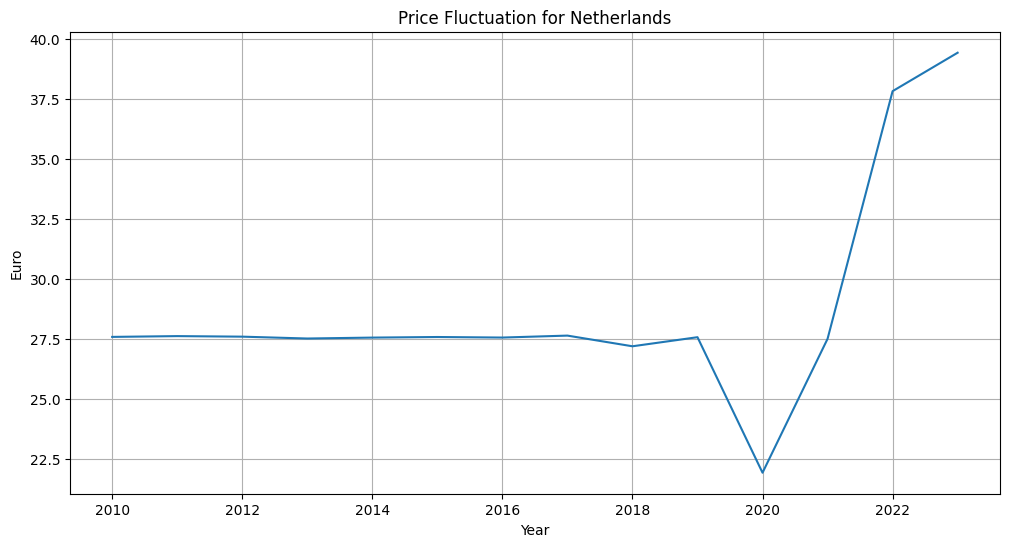

<ipython-input-114-c08707ce421d>:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_demand = country_data.resample('Y').mean()['demand']
<ipython-input-114-c08707ce421d>:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_supply = country_data.resample('Y').mean()['supply']


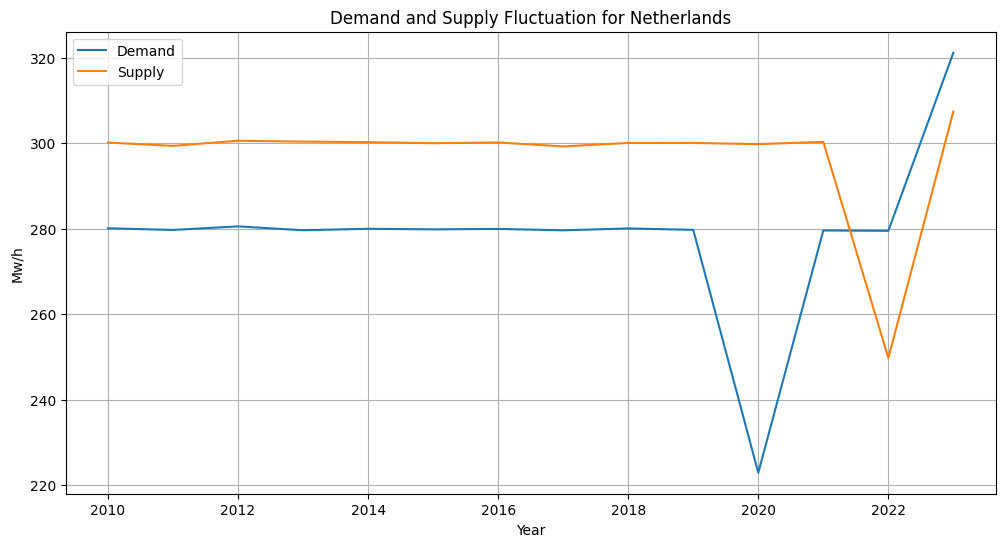

<ipython-input-114-c08707ce421d>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_price = country_data.resample('Y').mean()['price']


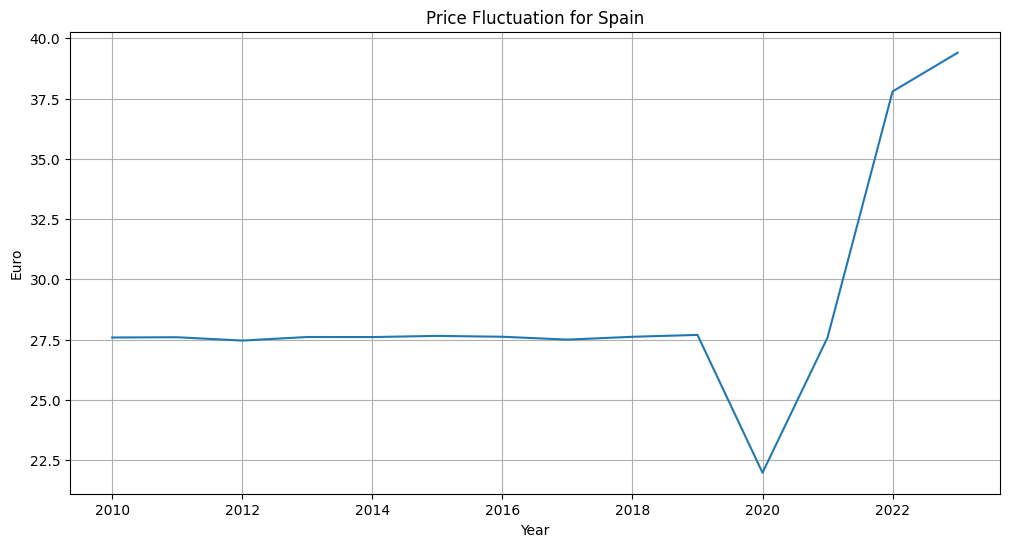

<ipython-input-114-c08707ce421d>:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_demand = country_data.resample('Y').mean()['demand']
<ipython-input-114-c08707ce421d>:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_supply = country_data.resample('Y').mean()['supply']


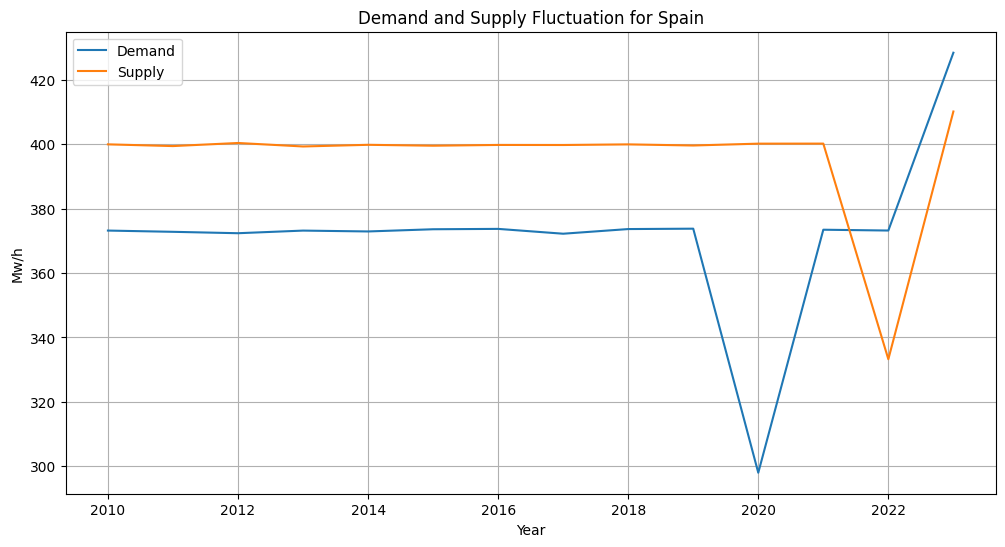

In [ ]:
# Plot price fluctuation over the years for each country
for country in countries:
    # Filter data for the specific country
    country_data = clean_df[clean_df['country'] == country]

    # Group data by year and calculate the mean price
    yearly_mean_price = country_data.resample('Y').mean()['price']

    # Plot price fluctuation
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_mean_price.index.year, yearly_mean_price)
    plt.xlabel('Year')
    plt.ylabel('Euro')
    plt.title(f'Price Fluctuation for {country}')
    plt.grid(True)
    plt.show()


    # Group data by year and calculate the mean demand and supply
    yearly_mean_demand = country_data.resample('Y').mean()['demand']
    yearly_mean_supply = country_data.resample('Y').mean()['supply']

    # Plot demand and supply fluctuation
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_mean_demand.index.year, yearly_mean_demand, label='Demand')
    plt.plot(yearly_mean_supply.index.year, yearly_mean_supply, label='Supply')
    plt.xlabel('Year')
    plt.ylabel('Mw/h')
    plt.title(f'Demand and Supply Fluctuation for {country}')
    plt.legend()
    plt.grid(True)
    plt.show()


## Insights in Price Fluctuation

- The price decrease observed in the year 2020 can be attributed to a decrease in electricity demand caused by a global event, namely the COVID-19 pandemic. The pandemic led to reduced economic activity and energy consumption, resulting in lower demand for electricity and subsequently affecting the prices in the power trading market.

- However, in the year 2022, a significant steep increase in prices can be observed. This price surge can be primarily attributed to a decrease in the supply of electricity. Factors such as maintenance outages, unexpected shutdowns of power plants, or disruptions in fuel supply may have contributed to the decrease in supply, leading to a sudden spike in prices in the power trading market.

- Interestingly, even after the supply of electricity increased in 2023 compared to regular years, there was also an increase in demand. This increase in demand could be driven by factors such as economic recovery, growth in industrial activity, or the adoption of electric vehicles. The simultaneous increase in supply and demand in 2023 likely influenced the pricing dynamics in the power trading market.

These insights highlight the interplay between supply, demand, and external events in the power trading domain. Understanding these factors and their impact on electricity prices is crucial for power traders, energy market participants, and policymakers to make informed decisions and develop effective strategies for electricity trading and market operations.


## •	How could we develop a machine learning solution that utilize this data?

A machine learning solution that utilizes the dataset of historical electricity demand, supply, and spot market prices for five European countries can be applied to various use cases in the energy domain. Some potential use cases include:

1. **Load Forecasting**: Use machine learning algorithms to forecast electricity demand for future time periods. This can help energy companies and grid operators in optimizing resource allocation, load balancing, and capacity planning.

2. **Price Prediction**: Develop models to predict spot market prices for electricity based on historical data. These predictions can assist energy traders, market participants, and consumers in making informed decisions regarding energy purchasing, contract negotiations, and pricing strategies.

3. **Demand Response Optimization**: Utilize machine learning techniques to optimize demand response programs, where consumers are incentivized to adjust their electricity consumption during peak periods. Models can help identify patterns and factors that influence demand response participation and design effective strategies to manage load during critical times.

4. **Anomaly Detection**: Apply anomaly detection algorithms to identify unusual or abnormal patterns in electricity demand, supply, or prices. This can assist in detecting energy theft, equipment failures, or market manipulations, allowing for timely intervention and mitigation.

5. **Energy Portfolio Optimization**: Develop models to optimize energy portfolios by considering the historical behavior of electricity demand, supply, and prices. Machine learning algorithms can assist in designing optimal energy procurement strategies, balancing energy sources, and minimizing costs or carbon footprint.

6. **Renewable Energy Integration**: Use machine learning to predict renewable energy generation based on weather data and historical electricity patterns. This information can help grid operators manage the intermittent nature of renewable energy sources and plan for effective integration into the grid.

7. **Energy Trading Strategies**: Employ machine learning algorithms to develop trading strategies for energy markets, considering historical price patterns, demand-supply dynamics, and market trends. These strategies can assist energy traders in making informed decisions and optimizing their trading activities.

8. **Energy Consumption Analytics**: Analyze historical electricity demand data to identify consumption patterns, peak hours, and seasonal variations. This information can be used by consumers, businesses, and policymakers to optimize energy usage, implement energy-saving measures, and develop energy efficiency programs.

These are just a few examples of the use cases where machine learning can be applied to leverage historical electricity data. The specific applications and solutions can vary based on the needs and objectives of energy companies, grid operators, market participants, policymakers, and consumers in the energy sector.


# Case Study: Machine Learning for Power Trading with Historical Electricity Data

## Objective
Develop a machine learning solution utilizing historical electricity data to enhance power trading strategies and decision-making.

## Dataset
The synthetic dataset includes historical electricity demand, supply, and spot market prices for five European countries over the past decade.

## Approach
1. Data Preprocessing: Clean and preprocess the dataset to handle missing values, outliers, and inconsistencies.

2. Feature Engineering: Extract relevant features such as time-related data, weather information, and economic indicators.

3. Model Development: Train machine learning models (e.g., linear regression, decision trees, random forests) to predict electricity prices or demand.

4. Model Evaluation and Optimization: Evaluate models using metrics like mean squared error and optimize performance through hyperparameter tuning and cross-validation.

5. Forecasting and Decision Support: Utilize trained models to forecast future electricity prices or demand, aiding power trading decisions.

6. Continuous Monitoring and Improvement: Deploy the solution in a production environment, monitor performance, and update models with new data to ensure accuracy and reliability.

By applying machine learning to historical electricity data, the solution enables traders to gain insights, optimize strategies, and manage risks effectively in the dynamic power trading domain.

Note: The implementation details may vary based on dataset characteristics and specific business requirements.


# Design Data Model

Here's the schema for the given tables in markdown code language:

**Country Table:**

| Column        | Data Type     | Description                  |
| ------------- | ------------- | ---------------------------- |
| country_id    | Primary Key   | Identifier for the country    |
| country_name  |              | Name of the country           |
| timestamp     |              | Timestamp of the entry        |

**Electricity Demand Table:**

| Column        | Data Type     | Description                           |
| ------------- | ------------- | ------------------------------------- |
| country_id    | Foreign Key   | Identifier for the country             |
| timestamp     |               | Timestamp of the demand measurement    |
| demand_value  |               | Value of electricity demand            |

**Electricity Supply Table:**

| Column        | Data Type     | Description                           |
| ------------- | ------------- | ------------------------------------- |
| country_id    | Foreign Key   | Identifier for the country             |
| timestamp     |               | Timestamp of the supply measurement    |
| supply_value  |               | Value of electricity supply            |

**Spot Market Prices Table:**

| Column        | Data Type     | Description                           |
| ------------- | ------------- | ------------------------------------- |
| country_id    | Foreign Key   | Identifier for the country             |
| timestamp     |               | Timestamp of the price measurement     |
| price_value   |               | Value of spot market electricity price |

**The reasons behind choosing this data model for the historical electricity data case study:**

**Separation of Concerns:** The data model separates different aspects of the data into separate tables. This separation allows for easier maintenance, scalability, and querying of the data. Each table focuses on a specific type of data (demand, supply, prices), which facilitates efficient data retrieval and analysis.

**Entity-Relationship Design:** The model follows the entity-relationship paradigm, which helps in organizing the data based on entities (countries) and their relationships (demand, supply, prices). This approach enhances data integrity, as each entity is represented by a unique ID, and relationships are established through foreign keys.

**Flexibility and Extensibility:** The data model is designed to accommodate potential future modifications and additions. For example, if new data types or attributes need to be incorporated, such as weather data or renewable energy generation, the model can be extended by adding additional tables or attributes while maintaining the existing structure.

**Query Performance:** The data model allows for efficient querying of the data. With proper indexing and optimization techniques, queries can be performed on specific countries, timestamps, or data types without the need for scanning the entire dataset.

**Data Integrity:** By using primary and foreign keys, the data model ensures data integrity and consistency. Each record in a table can be uniquely identified, and relationships between tables can be enforced, preventing data inconsistencies or anomalies.

**Simplified Analysis:** The data model provides a structured framework for data analysis. Analysts, algo traders, and quants can easily retrieve and analyze specific subsets of data based on their requirements, such as studying the correlation between supply and prices for a particular country.
